<a href="https://colab.research.google.com/github/najafzade/Mask_RCNN/blob/master/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi  # For GPUs


Sun Sep 21 18:42:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# !pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118
# !pip install pycocotools
# !pip install git+https://github.com/facebookresearch/detectron2.git
# !pip install git+https://github.com/matterport/Mask_RCNN.git

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", l

In [3]:
!pip install numpy opencv-python matplotlib
!pip install kaggle;
!pip install pascal-voc-writer  # Install the pascal-voc-writer package
# !pip install git+https://github.com/matterport/Mask_RCNN.git
# !pip install -U albumentations


In [4]:
!pip install --upgrade pip setuptools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!apt-get install -y build-essential cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.12).
libavcodec-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libswscale-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz gettext gettext-base
  gir1.2-atk-1.0 gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-gtk-

In [ ]:

!pip install 'git+https://github.com/facebookresearch/detectron2.git'

!pip install torch torchvision detectron2
# !python -m pip install roboflow
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-af391myv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-af391myv
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving classes.txt to classes.txt
Saving kaggle.json to kaggle.json


{'classes.txt': b'0   rice leaf roller \t\t\t\r\n1   rice leaf caterpillar \t\t\r\n2   paddy stem maggot \t\t\t\r\n3   asiatic rice borer \t\t\t\r\n4   yellow rice borer \t\t\t\r\n5   rice gall midge \t\t\t\r\n6   Rice Stemfly \t     \t\t\r\n7   brown plant hopper \t\t\t\r\n8   white backed plant hopper \t\r\n9   small brown plant hopper \t\r\n10  rice water weevil \t\t\t\r\n11  rice leafhopper \t\t\t\r\n12  grain spreader thrips \t\t\r\n13  rice shell pest \t\t\t\r\n14  grub \t\t            \t\r\n15  mole cricket \t\t\t    \r\n16  wireworm \t\t\t        \r\n17  white margined moth \t\t\r\n18  black cutworm \t\t\t    \r\n19  large cutworm \t\t\t    \r\n20  yellow cutworm \t\t        \r\n21  red spider \t\t\t        \r\n22  corn borer \t\t\t        \r\n23  army worm \t\t\t        \r\n24  aphids \t\t\t            \r\n25  Potosiabre vitarsis \t\t\r\n26  peach borer \t\t     \t\r\n27  english grain aphid \t\t\r\n28  green bug \t\t\t        \r\n29  bird cherry-oataphid \t\t\r\n30  wheat blo

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d parserpixy/ip102-dataset
!unzip ip102-dataset.zip -d /content/ip102-dataset;
!rm ip102-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/ip102-dataset/JPEGImages/IP074000034.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000045.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000046.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000049.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000051.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000053.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000054.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000055.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000056.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000057.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000058.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000059.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000060.jpg  
  inflating: /content/ip102-dataset/JPEGImages/IP074000061.jpg  
  inflating: /content/ip102-dataset/JPE

In [ ]:
import os

dataset_dir = '/content/ip102-dataset'
for root, dirs, files in os.walk(dataset_dir):
    print(f"Directory: {root}")
    for file in files[:5]:  # Print first 5 files per directory
        print(f"File: {file}")


Directory: /content/ip102-dataset
File: trainval.txt
File: test.txt
Directory: /content/ip102-dataset/JPEGImages
File: IP018000490.jpg
File: IP085000358.jpg
File: IP014000318.jpg
File: IP071003569.jpg
File: IP024001668.jpg
Directory: /content/ip102-dataset/Annotations
File: IP096000173.xml
File: IP048000131.xml
File: IP065000111.xml
File: IP038000600.xml
File: IP019000091.xml


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the classes.txt file

with open("/content/classes.txt", "r") as f:
    class_names = [line.strip() for line in f.readlines()]

print(f"Loaded class names: {class_names}")

Saving classes.txt to classes (1).txt
Loaded class names: ['0   rice leaf roller', '1   rice leaf caterpillar', '2   paddy stem maggot', '3   asiatic rice borer', '4   yellow rice borer', '5   rice gall midge', '6   Rice Stemfly', '7   brown plant hopper', '8   white backed plant hopper', '9   small brown plant hopper', '10  rice water weevil', '11  rice leafhopper', '12  grain spreader thrips', '13  rice shell pest', '14  grub', '15  mole cricket', '16  wireworm', '17  white margined moth', '18  black cutworm', '19  large cutworm', '20  yellow cutworm', '21  red spider', '22  corn borer', '23  army worm', '24  aphids', '25  Potosiabre vitarsis', '26  peach borer', '27  english grain aphid', '28  green bug', '29  bird cherry-oataphid', '30  wheat blossom midge', '31  penthaleus major', '32  longlegged spider mite', '33  wheat phloeothrips', '34  wheat sawfly', '35  cerodonta denticornis', '36  beet fly', '37  flea beetle', '38  cabbage army worm', '39  beet army worm', '40  Beet spot f

***** distibution of calsses amoug dataset*****

In [ ]:
import xml.etree.ElementTree as ET
import os
import pandas as pd

# Paths to dataset and text files
dataset_dir = '/content/ip102-dataset'
images_dir = os.path.join(dataset_dir, 'JPEGImages')
annotations_dir = os.path.join(dataset_dir, 'Annotations')

# Load class names from the provided file
class_id_to_name = {}
with open("/content/classes.txt", "r") as f:
    for line in f:
        parts = line.strip().split(' ', 1)  # Split on first space
        if len(parts) > 1:
            class_id_to_name[int(parts[0])] = parts[1]  # Map ID to name

# Function to get class label from annotation file
def get_class_from_annotation(annotation_file):
    try:
        tree = ET.parse(annotation_file)
        root = tree.getroot()
        objects = root.findall('object')
        # Assuming that there is only one class per image
        if objects:
            return int(objects[0].find('name').text)  # Extracting the class number
        return None
    except ET.ParseError as e:
        # Handle XML parsing error
        print(f"Error parsing {annotation_file}: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error with {annotation_file}: {e}")
        return None

# Function to count images per class
def count_images_per_class(image_list):
    class_count = {}
    for image_name in image_list:
        annotation_file = os.path.join(annotations_dir, f"{image_name}.xml")
        class_label = get_class_from_annotation(annotation_file)
        if class_label is not None:
            class_count[class_label] = class_count.get(class_label, 0) + 1
    return class_count

# Load the trainval and test image names from the respective files
def load_image_names(file_path):
    with open(file_path, 'r') as f:
        return [line.strip() for line in f]

# Paths to trainval.txt and test.txt
trainval_file = os.path.join(dataset_dir, 'trainval.txt')
test_file = os.path.join(dataset_dir, 'test.txt')

# Load trainval and test lists
trainval_list = load_image_names(trainval_file)
test_list = load_image_names(test_file)

# Count images per class in both trainval and test sets
trainval_class_distribution = count_images_per_class(trainval_list)
test_class_distribution = count_images_per_class(test_list)

# Ensure all classes are included, even if they have zero images
all_classes = set(class_id_to_name.keys())  # Include all class IDs present in the class name file
trainval_class_distribution = {cls: trainval_class_distribution.get(cls, 0) for cls in all_classes}
test_class_distribution = {cls: test_class_distribution.get(cls, 0) for cls in all_classes}

# Prepare data for displaying
data = []

for cls in all_classes:
    total_trainval = trainval_class_distribution[cls]
    total_test = test_class_distribution[cls]
    trainval_percentage = (total_trainval / len(trainval_list)) * 100 if len(trainval_list) > 0 else 0
    test_percentage = (total_test / len(test_list)) * 100 if len(test_list) > 0 else 0
    class_name = class_id_to_name[cls]
    data.append([cls, class_name, total_trainval, f"{trainval_percentage:.2f}%", total_test, f"{test_percentage:.2f}%"])

# Add the total row
total_trainval = sum(trainval_class_distribution.values())
total_test = sum(test_class_distribution.values())
total_row = ['Total', 'All Classes', total_trainval, '100.00%', total_test, '100.00%']
data.append(total_row)

# Create DataFrame for better visualization
df = pd.DataFrame(data, columns=["Class", "Class Name", "Trainval Images", "Trainval %", "Test Images", "Test %"])

# Adjust pandas display settings for Colab
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set the width to avoid line breaks
pd.set_option('display.colheader_justify', 'center')  # Center-align column headers

# Display the full DataFrame
from IPython.display import display
display(df)

# Save the output to a CSV file
output_csv_path = os.path.join(dataset_dir, 'class_distribution_with_names.csv')
df.to_csv(output_csv_path, index=False)
print(f"\nThe class distribution table with class names has been saved to {output_csv_path}")


Error parsing /content/ip102-dataset/Annotations/IP087000986.xml: junk after document element: line 27, column 0


,Class,Class Name,Trainval Images,Trainval %,Test Images,Test %
0,0,rice leaf roller,139,0.92%,35,0.92%
1,1,rice leaf caterpillar,91,0.60%,23,0.61%
2,2,paddy stem maggot,20,0.13%,5,0.13%
3,3,asiatic rice borer,133,0.88%,33,0.87%
4,4,yellow rice borer,65,0.43%,16,0.42%
5,5,rice gall midge,74,0.49%,19,0.50%
6,6,Rice Stemfly,22,0.14%,6,0.16%
7,7,brown plant hopper,89,0.59%,22,0.58%
8,8,white backed plant hopper,62,0.41%,16,0.42%
9,9,small brown plant hopper,41,0.27%,11,0.29%



The class distribution table with class names has been saved to /content/ip102-dataset/class_distribution_with_names.csv


In [ ]:
total_images = len(os.listdir(images_dir))
print(f"Total images in dataset: {total_images}")


Total images in dataset: 18981


Pick classes with more than 200 images

In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
from collections import defaultdict

# Paths to dataset and text files
dataset_dir = '/content/ip102-dataset'
images_dir = os.path.join(dataset_dir, 'JPEGImages')
annotations_dir = os.path.join(dataset_dir, 'Annotations')
trainval_file = os.path.join(dataset_dir, 'trainval.txt')
test_file = os.path.join(dataset_dir, 'test.txt')

# Output directories
output_dir = '/content/split-dataset'
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Minimum images required for a class to be included
min_images = 500
max_images = 1000

# Prepare directories
def prepare_directories(dirs):
    for split in dirs:
        if os.path.exists(split):
            shutil.rmtree(split)
        os.makedirs(os.path.join(split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(split, 'annotations'), exist_ok=True)

# Function to copy image and annotation files
def copy_files(file_list, split_dir):
    for base_name in file_list:
        image_file = os.path.join(images_dir, f"{base_name}.jpg")
        annotation_file = os.path.join(annotations_dir, f"{base_name}.xml")
        if os.path.exists(image_file) and os.path.exists(annotation_file):
            shutil.copy(image_file, os.path.join(split_dir, 'images'))
            shutil.copy(annotation_file, os.path.join(split_dir, 'annotations'))

# Count images per class
def count_class_images(file_list):
    class_counts = defaultdict(int)
    image_classes = {}
    for base_name in file_list:
        annotation_file = os.path.join(annotations_dir, f"{base_name}.xml")
        if not os.path.exists(annotation_file):
            continue
        try:
            tree = ET.parse(annotation_file)
            root = tree.getroot()
            objects = root.findall('object')
            if objects:
                class_label = int(objects[0].find('name').text)
                class_counts[class_label] += 1
                image_classes[base_name] = class_label
        except:
            continue
    return class_counts, image_classes

# Load file lists
with open(trainval_file, 'r') as f:
    trainval_list = f.read().strip().split()
with open(test_file, 'r') as f:
    test_list = f.read().strip().split()

# Count images per class
class_counts, image_classes = count_class_images(trainval_list + test_list)

# Filter classes with at least min_images
valid_classes = {cls for cls, count in class_counts.items() if min_images <= count <= max_images}

# Select train and test images only from valid classes
train_images = [img for img in trainval_list if image_classes.get(img) in valid_classes]
test_images = [img for img in test_list if image_classes.get(img) in valid_classes]

# Prepare directories
prepare_directories([train_dir, test_dir])

# Copy files
print("Copying train files...")
copy_files(train_images, train_dir)
print("Copying test files...")
copy_files(test_images, test_dir)

print("Filtered dataset successfully split into train and test sets!")

Copying train files...
Copying test files...
Filtered dataset successfully split into train and test sets!


In [ ]:
!rm -r /content/split-dataset

In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
from collections import defaultdict

# Paths to dataset and text files
dataset_dir = '/content/ip102-dataset'
images_dir = os.path.join(dataset_dir, 'JPEGImages')
annotations_dir = os.path.join(dataset_dir, 'Annotations')
trainval_file = os.path.join(dataset_dir, 'trainval.txt')
test_file = os.path.join(dataset_dir, 'test.txt')

# Output directories
output_dir = '/content/split-dataset'
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Filter classes with 500-1000 images in TRAINVAL
min_images = 300
max_images = 400

# Prepare directories
def prepare_directories(dirs):
    for split in dirs:
        if os.path.exists(split):
            shutil.rmtree(split)
        os.makedirs(os.path.join(split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(split, 'annotations'), exist_ok=True)

# Function to copy image and annotation files
def copy_files(file_list, split_dir):
    for base_name in file_list:
        image_file = os.path.join(images_dir, f"{base_name}.jpg")
        annotation_file = os.path.join(annotations_dir, f"{base_name}.xml")
        if os.path.exists(image_file) and os.path.exists(annotation_file):
            shutil.copy(image_file, os.path.join(split_dir, 'images'))
            shutil.copy(annotation_file, os.path.join(split_dir, 'annotations'))

# Count images per class IN TRAINVAL ONLY
def count_trainval_classes():
    class_counts = defaultdict(int)
    with open(trainval_file, 'r') as f:
        trainval_list = f.read().strip().split()

    for base_name in trainval_list:
        annotation_file = os.path.join(annotations_dir, f"{base_name}.xml")
        if not os.path.exists(annotation_file):
            continue
        try:
            tree = ET.parse(annotation_file)
            root = tree.getroot()
            objects = root.findall('object')
            if objects:
                class_label = int(objects[0].find('name').text)
                class_counts[class_label] += 1
        except:
            continue
    return class_counts

# 1. Count classes using TRAINVAL only
class_counts = count_trainval_classes()

# 2. Filter valid classes (500-1000 images in trainval)
valid_classes = {
    cls for cls, count in class_counts.items()
    if min_images <= count <= max_images
}

print("Valid Classes (500-1000 in trainval):", valid_classes)
print("Class Counts in Trainval:", {k: class_counts[k] for k in valid_classes})

# 3. Get all images for valid classes from BOTH splits
def get_images_for_classes(valid_classes, source_file):
    selected = []
    with open(source_file, 'r') as f:
        base_names = f.read().strip().split()

    for base_name in base_names:
        annotation_file = os.path.join(annotations_dir, f"{base_name}.xml")
        if not os.path.exists(annotation_file):
            continue
        try:
            tree = ET.parse(annotation_file)
            root = tree.getroot()
            first_object = root.find('object')
            if first_object is not None:
                class_id = int(first_object.find('name').text)
                if class_id in valid_classes:
                    selected.append(base_name)
        except:
            continue
    return selected

# 4. Get final lists
train_images = get_images_for_classes(valid_classes, trainval_file)  # Original trainval
test_images = get_images_for_classes(valid_classes, test_file)       # Original test

# 5. Create directories and copy
prepare_directories([train_dir, test_dir])
print("\nCopying train files...")
copy_files(train_images, train_dir)
print("Copying test files...")
copy_files(test_images, test_dir)

print(f"\nFinal counts:")
print(f"- Train images: {len(train_images)}")
print(f"- Test images: {len(test_images)}")
print(f"- Valid classes: {len(valid_classes)}")

Valid Classes (500-1000 in trainval): {39, 45, 14, 16, 50, 22, 86}
Class Counts in Trainval: {39: 330, 45: 328, 14: 349, 16: 339, 50: 348, 22: 339, 86: 330}

Copying train files...
Copying test files...

Final counts:
- Train images: 2363
- Test images: 592
- Valid classes: 7


In [ ]:
!ls /content/split-dataset/train/images | wc -l  # Number of training images
# !ls /content/split-dataset/val/images | wc -l    # Number of validation images
!ls /content/split-dataset/test/images | wc -l   # Number of test images


2363
592


************ Convert annotation from VOC to COCO***********


In [ ]:
import os
import json
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import ParseError

# Paths
dataset_dir = "/content/split-dataset"  # Base directory containing train, val, and test
splits = ["train_augmented", "train", "val", "test"]  # Subdirectories to process
output_dir = "/content/split-dataset/coco_annotations"  # Output JSON directory
os.makedirs(output_dir, exist_ok=True)

# Load class names from classes.txt
with open("/content/classes.txt", "r") as f:
    class_names = [line.strip().lower() for line in f.readlines()]  # Convert to lowercase and strip spaces

# Print loaded class names
print(f"Loaded class names: {class_names}")

# Initialize COCO JSON structure template
def init_coco_structure():
    return {
        "images": [],
        "annotations": [],
        "categories": []
    }

# Main conversion function
def convert_voc_to_coco(split_name, annotations_dir, images_dir, output_path):
    coco = init_coco_structure()
    category_map = {}  # Mapping of class name to category ID
    category_id = 1
    annotation_id = 1

    # Iterate through annotation files
    for xml_file in os.listdir(annotations_dir):
        if not xml_file.endswith(".xml"):
            continue

        # Parse XML
        xml_path = os.path.join(annotations_dir, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
        except ParseError as e:
            print(f"Skipping {xml_file} due to XML parsing error: {e}")
            continue

        # Extract image metadata
        filename = root.find("filename").text
        size = root.find("size")
        width = int(size.find("width").text)
        height = int(size.find("height").text)

        # Add image info
        filename = filename.strip()  # Strip any extra spaces
        if not filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            filename += '.jpg'  # Assuming .jpg if extension is missing
        image_path = os.path.join(images_dir, filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Skipping {filename} as image file is missing.")
            continue

        image_id = len(coco["images"]) + 1
        coco["images"].append({
            "id": image_id,
            "file_name": filename,
            "width": width,
            "height": height,
            "path": image_path  # Added full image path
        })

        # Parse objects
        for obj in root.findall("object"):
            class_name_or_id = obj.find("name").text.strip()  # Get the class name or ID

            # Check if the class_name_or_id is a number (ID)
            if class_name_or_id.isdigit():
                class_id = int(class_name_or_id)  # Class ID
                if class_id < len(class_names):
                    class_name = class_names[class_id]
                else:
                    print(f"Warning: Class ID '{class_id}' not found in class names.")
                    class_name = "Unknown"  # Handle unknown class names if any
            else:
                # Treat it as a class name
                class_name = class_name_or_id.lower()  # Normalize to lowercase
                if class_name not in class_names:
                    print(f"Warning: Class name '{class_name}' not found in class names.")
                    class_name = "Unknown"  # Handle unknown class names if any

            # Check if category ID is already assigned to class name
            if class_name not in category_map:
                category_map[class_name] = category_id
                coco["categories"].append({
                    "id": category_id,
                    "name": class_name,
                    "supercategory": "none"
                })
                category_id += 1  # Increment category ID for the next class

            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)

            # Convert VOC bbox to COCO bbox format [xmin, ymin, width, height]
            bbox = [xmin, ymin, xmax - xmin, ymax - ymin]
            area = bbox[2] * bbox[3]

            # Add annotation
            coco["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": category_map[class_name],  # Correct category ID assigned here
                "bbox": bbox,
                "area": area,
                "segmentation": [],  # Empty if no segmentation mask
                "iscrowd": 0
            })
            annotation_id += 1

    # Save the COCO JSON
    with open(output_path, "w") as f:
        json.dump(coco, f)
    print(f"COCO annotations for '{split_name}' saved to {output_path}")

# Process each split (train, val, test)
for split in splits:
    annotations_dir = os.path.join(dataset_dir, split, "annotations")
    images_dir = os.path.join(dataset_dir, split, "images")
    output_path = os.path.join(output_dir, f"{split}_coco.json")

    if not os.path.exists(annotations_dir) or not os.path.exists(images_dir):
        print(f"Skipping '{split}' as required directories are missing.")
        continue

    convert_voc_to_coco(split, annotations_dir, images_dir, output_path)


Loaded class names: ['0   rice leaf roller', '1   rice leaf caterpillar', '2   paddy stem maggot', '3   asiatic rice borer', '4   yellow rice borer', '5   rice gall midge', '6   rice stemfly', '7   brown plant hopper', '8   white backed plant hopper', '9   small brown plant hopper', '10  rice water weevil', '11  rice leafhopper', '12  grain spreader thrips', '13  rice shell pest', '14  grub', '15  mole cricket', '16  wireworm', '17  white margined moth', '18  black cutworm', '19  large cutworm', '20  yellow cutworm', '21  red spider', '22  corn borer', '23  army worm', '24  aphids', '25  potosiabre vitarsis', '26  peach borer', '27  english grain aphid', '28  green bug', '29  bird cherry-oataphid', '30  wheat blossom midge', '31  penthaleus major', '32  longlegged spider mite', '33  wheat phloeothrips', '34  wheat sawfly', '35  cerodonta denticornis', '36  beet fly', '37  flea beetle', '38  cabbage army worm', '39  beet army worm', '40  beet spot flies', '41  meadow moth', '42  beet we

In [ ]:
# import os
# import json
# import xml.etree.ElementTree as ET
# from xml.etree.ElementTree import ParseError

# # Paths
# dataset_dir = "/content/split-dataset"  # Base directory containing train, val, and test
# splits = ["train", "test"]  # Subdirectories to process

# output_dir = "/content/split-dataset/coco_annotations"  # Output JSON directory
# os.makedirs(output_dir, exist_ok=True)

# # Load class names from classes.txt
# with open("/content/classes.txt", "r") as f:
#     class_names = [line.strip().lower() for line in f.readlines()]  # Convert to lowercase and strip spaces

# # Print loaded class names
# print(f"Loaded class names: {class_names}")

# # Initialize COCO JSON structure template
# def init_coco_structure():
#     return {
#         "images": [],
#         "annotations": [],
#         "categories": []
#     }

# # Main conversion function
# def convert_voc_to_coco(split_name, annotations_dir, images_dir, output_path):
#     coco = init_coco_structure()
#     category_map = {}  # Mapping of class name to category ID
#     category_id = 1  # Start category_id from 1
#     annotation_id = 1

#     # Iterate through annotation files
#     for xml_file in os.listdir(annotations_dir):
#         if not xml_file.endswith(".xml"):
#             continue

#         # Parse XML
#         xml_path = os.path.join(annotations_dir, xml_file)
#         try:
#             tree = ET.parse(xml_path)
#             root = tree.getroot()
#         except ParseError as e:
#             print(f"Skipping {xml_file} due to XML parsing error: {e}")
#             continue

#         # Extract image metadata
#         filename = root.find("filename").text.strip()
#         size = root.find("size")
#         width = int(size.find("width").text)
#         height = int(size.find("height").text)

#         # Skip image if class name is not one of the three valid classes
#         valid_classes = set([class_name.lower() for class_name in class_names])
#         found_classes = set()

#         # Parse objects
#         for obj in root.findall("object"):
#             class_name_or_id = obj.find("name").text.strip().lower()  # Normalize class name

#             # If class_name_or_id is a number (ID), map it to the class name
#             if class_name_or_id.isdigit():
#                 class_id = int(class_name_or_id)
#                 if class_id < len(class_names) and class_id > 0:
#                     class_name = class_names[class_id - 1].lower()  # Normalize to lowercase
#                 else:
#                     print(f"Warning: Invalid Class ID '{class_id}' found in {xml_file}")
#                     continue  # Skip annotation if class_id is invalid
#             else:
#                 # Treat it as a class name
#                 class_name = class_name_or_id

#             if class_name not in valid_classes:
#                 continue  # Skip this object if class is not in valid classes list

#             # Add to found classes set
#             found_classes.add(class_name)

#             # Check if category ID is already assigned to class name
#             if class_name not in category_map:
#                 category_map[class_name] = category_id
#                 coco["categories"].append({
#                     "id": category_id,
#                     "name": class_name,
#                     "supercategory": "none"
#                 })
#                 category_id += 1  # Increment category ID for the next class

#             # Get bounding box coordinates
#             bndbox = obj.find("bndbox")
#             xmin = int(bndbox.find("xmin").text)
#             ymin = int(bndbox.find("ymin").text)
#             xmax = int(bndbox.find("xmax").text)
#             ymax = int(bndbox.find("ymax").text)

#             # Convert VOC bbox to COCO bbox format [xmin, ymin, width, height]
#             bbox = [xmin, ymin, xmax - xmin, ymax - ymin]
#             area = bbox[2] * bbox[3]

#             # Add annotation
#             coco["annotations"].append({
#                 "id": annotation_id,
#                 "image_id": len(coco["images"]) + 1,  # Incremental image ID
#                 "category_id": category_map[class_name],  # Correct category ID assigned here
#                 "bbox": bbox,
#                 "area": area,
#                 "segmentation": [],  # Empty if no segmentation mask
#                 "iscrowd": 0
#             })
#             annotation_id += 1

#         # If at least one valid object was found for the image, add image metadata
#         if found_classes:
#             image_id = len(coco["images"]) + 1
#             coco["images"].append({
#                 "id": image_id,
#                 "file_name": filename,
#                 "width": width,
#                 "height": height,
#                 "path": os.path.join(images_dir, filename)
#             })

#     # Save the COCO JSON
#     with open(output_path, "w") as f:
#         json.dump(coco, f)
#     print(f"COCO annotations for '{split_name}' saved to {output_path}")

# # Convert VOC to COCO for each split
# for split in splits:
#     annotations_dir = os.path.join(dataset_dir, split, "annotations")
#     images_dir = os.path.join(dataset_dir, split, "JPEGImages")
#     output_path = os.path.join(output_dir, f"{split}_coco.json")
#     convert_voc_to_coco(split, annotations_dir, images_dir, output_path)


Distribution on XML datat

In [ ]:
from collections import defaultdict
import os
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import ParseError

# Paths
dataset_dir = "/content/split-dataset"  # Base directory containing train, val, and test
# splits = ["train_augmented", "train", "val", "test"]  # Subdirectories to process
splits = [ "train", "test"]  # Subdirectories to process
output_dir = "/content/split-dataset/coco_annotations"  # Output JSON directory
os.makedirs(output_dir, exist_ok=True)

# Load class names from classes.txt
with open("/content/classes.txt", "r") as f:
    class_names = [line.strip().lower() for line in f.readlines()]  # Convert to lowercase and strip spaces

# Print loaded class names
print(f"Loaded class names: {class_names}")

# Function to count images per class in VOC format
def count_voc_images_per_class(annotations_dir):
    class_image_count = defaultdict(int)

    # Iterate through annotation files
    for xml_file in os.listdir(annotations_dir):
        if not xml_file.endswith(".xml"):
            continue

        # print(f"Processing: {xml_file}")  # Debug: Print each file being processed

        # Parse XML
        xml_path = os.path.join(annotations_dir, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
        except ParseError as e:
            print(f"Skipping {xml_file} due to XML parsing error: {e}")
            continue

        # Find all object class names in the image
        class_names_in_image = set()
        for obj in root.findall("object"):
            class_name_or_id = obj.find("name").text.strip()  # Get class name or ID
            # print(f"Found class name or ID: {class_name_or_id}")  # Debug: Print class name found in annotation

            # Check if class_name_or_id is numeric (class ID)
            if class_name_or_id.isdigit():
                class_id = int(class_name_or_id)
                if class_id <= len(class_names):
                    class_name = class_names[class_id ]  # Match to class name
                    class_names_in_image.add(class_name)
                else:
                    print(f"Warning: Class ID '{class_id}' is out of range in {xml_file}.")
            else:
                # Treat it as a string class name
                class_name = class_name_or_id.lower()
                if class_name in class_names:
                    class_names_in_image.add(class_name)
                else:
                    print(f"Warning: Class name '{class_name}' not found in class names.")

        # For each class in the current image, increment the count
        for class_name in class_names_in_image:
            class_image_count[class_name] += 1

    return class_image_count

# Calculate VOC class distribution for each split
voc_distributions = {}
for split in splits:
    annotations_dir = os.path.join(dataset_dir, split, "annotations")
    distribution = count_voc_images_per_class(annotations_dir)
    voc_distributions[split] = distribution

# Print the VOC distribution for each split
for split, distribution in voc_distributions.items():
    print(f"VOC distribution for {split}:")
    if not distribution:
        print("  No valid annotations found.")
    for class_name, count in distribution.items():
        print(f"  {class_name}: {count} images")


Loaded class names: ['0   rice leaf roller', '1   rice leaf caterpillar', '2   paddy stem maggot', '3   asiatic rice borer', '4   yellow rice borer', '5   rice gall midge', '6   rice stemfly', '7   brown plant hopper', '8   white backed plant hopper', '9   small brown plant hopper', '10  rice water weevil', '11  rice leafhopper', '12  grain spreader thrips', '13  rice shell pest', '14  grub', '15  mole cricket', '16  wireworm', '17  white margined moth', '18  black cutworm', '19  large cutworm', '20  yellow cutworm', '21  red spider', '22  corn borer', '23  army worm', '24  aphids', '25  potosiabre vitarsis', '26  peach borer', '27  english grain aphid', '28  green bug', '29  bird cherry-oataphid', '30  wheat blossom midge', '31  penthaleus major', '32  longlegged spider mite', '33  wheat phloeothrips', '34  wheat sawfly', '35  cerodonta denticornis', '36  beet fly', '37  flea beetle', '38  cabbage army worm', '39  beet army worm', '40  beet spot flies', '41  meadow moth', '42  beet we

In [ ]:
# Function to count images per class in COCO format
def count_coco_images_per_class(coco_json_path):
    with open(coco_json_path, "r") as f:
        coco_data = json.load(f)

    class_image_count = defaultdict(int)
    image_ids_per_class = defaultdict(set)  # To avoid counting the same image multiple times

    # Iterate through annotations and count images per class
    for ann in coco_data["annotations"]:
        category_id = ann["category_id"]
        image_id = ann["image_id"]

        # For each class, add the image_id to a set to ensure unique image counts
        image_ids_per_class[category_id].add(image_id)

    # Calculate the number of images per class
    for category_id, image_ids in image_ids_per_class.items():
        # Find the class name using category_id
        category_name = next((cat["name"] for cat in coco_data["categories"] if cat["id"] == category_id), None)
        if category_name:
            class_image_count[category_name] = len(image_ids)

    return class_image_count

# Calculate COCO class distribution for each split
coco_distributions = {}
for split in splits:
    coco_json_path = os.path.join(output_dir, f"{split}_coco.json")
    distribution = count_coco_images_per_class(coco_json_path)
    coco_distributions[split] = distribution

# Print the COCO distribution for each split
for split, distribution in coco_distributions.items():
    print(f"COCO distribution for {split}:")
    for class_name, count in distribution.items():
        print(f"  {class_name}: {count} images")


COCO distribution for train:
  16  wireworm: 339 images
  50  legume blister beetle: 348 images
  86  prodenia litura: 330 images
  14  grub: 349 images
  45  flax budworm: 328 images
  39  beet army worm: 330 images
  22  corn borer: 339 images
COCO distribution for test:
  39  beet army worm: 83 images
  50  legume blister beetle: 87 images
  22  corn borer: 85 images
  14  grub: 87 images
  86  prodenia litura: 83 images
  45  flax budworm: 82 images
  16  wireworm: 85 images


In [ ]:
import os
import json

# Directory containing the COCO annotation files
annotation_dir = "/content/split-dataset/coco_annotations"

# Loop through all files in the directory
for file_name in os.listdir(annotation_dir):
    # Check if the file is a JSON file
    if file_name.endswith(".json"):
        file_path = os.path.join(annotation_dir, file_name)
        with open(file_path, "r") as f:
            coco_data = json.load(f)

        # Extract categories (classes)
        categories = coco_data['categories']
        num_classes = len(categories)  # Total number of classes in the subset
        class_names = [category['name'] for category in categories]  # Class names

        # Print results for the current file
        print(f"File: {file_name}")
        print(f"Number of classes: {num_classes}")
        print(f"Class Names: {class_names}")
        print("-" * 40)


File: train_coco.json
Number of classes: 7
Class Names: ['16  wireworm', '50  legume blister beetle', '86  prodenia litura', '14  grub', '45  flax budworm', '39  beet army worm', '22  corn borer']
----------------------------------------
File: test_coco.json
Number of classes: 7
Class Names: ['39  beet army worm', '50  legume blister beetle', '22  corn borer', '14  grub', '86  prodenia litura', '45  flax budworm', '16  wireworm']
----------------------------------------


In [ ]:
import json
import os

# Specify the directory containing the COCO JSON files
coco_json_dir = "/content/split-dataset/coco_annotations"

# Ensure the directory exists
if not os.path.exists(coco_json_dir):
    print(f"Directory {coco_json_dir} does not exist!")
else:
    # Function to count images in a COCO JSON file
    def count_images_in_coco(json_file):
        try:
            with open(json_file, "r") as f:
                data = json.load(f)
            num_images = len(data.get("images", []))  # Safely handle missing "images" key
            print(f"File: {json_file}")
            print(f"Number of images: {num_images}")
            return num_images
        except Exception as e:
            print(f"Error reading file {json_file}: {e}")
            return 0

    # Iterate through all JSON files in the directory and count images
    total_images = 0
    for json_file in os.listdir(coco_json_dir):
        if json_file.endswith(".json"):
            json_path = os.path.join(coco_json_dir, json_file)
            total_images += count_images_in_coco(json_path)

    print(f"Total number of images across all files: {total_images}")


File: /content/split-dataset/coco_annotations/train_coco.json
Number of images: 2363
File: /content/split-dataset/coco_annotations/test_coco.json
Number of images: 592
Total number of images across all files: 2955


In [ ]:
# !ls /content/split-dataset/train_augmented/images | wc -l  # Number of training images
!ls /content/split-dataset/train/images | wc -l  # Number of training images
# !ls /content/split-dataset/val/images | wc -l    # Number of validation images
!ls /content/split-dataset/test/images | wc -l   # Number of test images


2363
592


In [ ]:
# !ls /content/split-dataset/train_augmented/
# !ls /content/split-dataset/val/
!ls /content/split-dataset/test/
!ls /content/split-dataset/coco_annotations/

annotations  images
test_coco.json	train_coco.json


Roboflow example

In [ ]:
import logging
import torch
from collections import OrderedDict
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.solver import build_lr_scheduler, build_optimizer
from detectron2.checkpoint import DetectionCheckpointer, PeriodicCheckpointer
from detectron2.utils.events import EventStorage
from detectron2.modeling import build_model
import detectron2.utils.comm as comm
from detectron2.engine import default_argument_parser, default_setup, default_writers, launch
from detectron2.data import (
    MetadataCatalog,
    build_detection_test_loader,
    build_detection_train_loader,
)
from detectron2.evaluation import (
    CityscapesInstanceEvaluator,
    CityscapesSemSegEvaluator,
    COCOEvaluator,
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    inference_on_dataset,
    print_csv_format,
)

# from roboflow import Roboflow

from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
from detectron2.data.catalog import DatasetCatalog, MetadataCatalog

VERSION = 3  # Assuming your Roboflow project version is 3

# Remove previous registrations
if "asl_poly_train" in DatasetCatalog.list():
    DatasetCatalog.remove("asl_poly_train")
    MetadataCatalog.remove("asl_poly_train")
if "asl_poly_valid" in DatasetCatalog.list():
    DatasetCatalog.remove("asl_poly_valid")
    MetadataCatalog.remove("asl_poly_valid")
if "asl_poly_test" in DatasetCatalog.list():
    DatasetCatalog.remove("asl_poly_test")
    MetadataCatalog.remove("asl_poly_test")

# Now register with the correct paths
register_coco_instances("asl_poly_train", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")# register_coco_instances("asl_poly_valid", {}, f"content/paddy-pest-3/valid/_annotations.coco.json", f"content/paddy-pest-3/valid")
register_coco_instances("asl_poly_valid", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")
register_coco_instances("asl_poly_test", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")



[02/10 00:31:21 d2.data.datasets.coco]: Loaded 2363 images in COCO format from /content/split-dataset/coco_annotations/train_coco.json


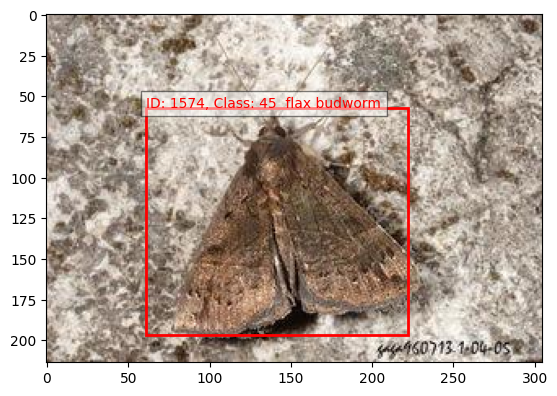

In [ ]:
from detectron2.data import DatasetCatalog
import random
from google.colab.patches import cv2_imshow  # Import the correct function

dataset_train = DatasetCatalog.get("asl_poly_train")
metadata = MetadataCatalog.get("asl_poly_train")

ig, ax = plt.subplots()
dataset_dict = random.choice(dataset_train)
im = Image.open(dataset_dict['file_name'])
ax.imshow(im)

for ann in dataset_dict['annotations']:
    x, y, w, h = ann['bbox']
    class_id = ann['category_id']
    class_name = metadata.thing_classes[class_id - 1]  # Get class name from metadata, COCO category_id starts from 1. Python list starts from 0

    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Use 'image_id' from the dataset_dict instead of ann
    text = f"ID: {dataset_dict['image_id']}, Class: {class_name}"
    ax.text(x, y, text, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

Class ID: 0
Class ID: 0


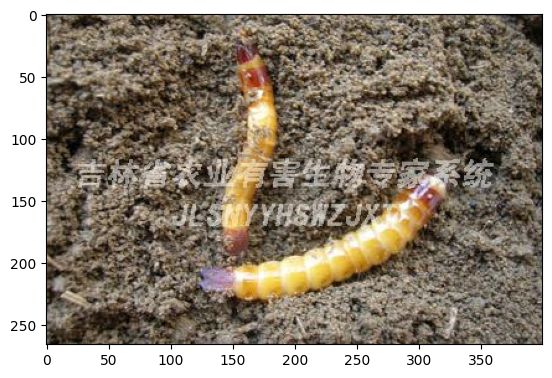

In [ ]:
from detectron2.data import DatasetCatalog
import random
from google.colab.patches import cv2_imshow  # Import the correct function

import matplotlib.pyplot as plt
from PIL import Image

# Randomly select a dataset
dataset_dict = random.choice(dataset_train)

# Open the image using PIL
im = Image.open(dataset_dict['file_name'])

# Create the plot
fig, ax = plt.subplots()
ax.imshow(im)

# Iterate over the annotations and add bounding boxes
for ann in dataset_dict['annotations']:
    x, y, w, h = ann['bbox']
    class_id = ann['category_id']

    # Debug: Print the class_id to see if it matches the expected values
    print(f"Class ID: {class_id}")

    # Check if the class_id is valid (i.e., within the range of the thing_classes list)
    if class_id - 1 < len(metadata.thing_classes) and class_id - 1 >= 0:
        class_name = metadata.thing_classes[class_id - 1]  # Get class name from metadata
    else:
        print(f"Warning: Invalid class_id {class_id} found for image {dataset_dict['image_id']}")
        continue  # Skip this annotation if the class_id is invalid

    # Draw the rectangle
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add class label text
    text = f"ID: {dataset_dict['image_id']}, Class: {class_name}"
    ax.text(x, y, text, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()


NameError: name 'dataset_train' is not defined

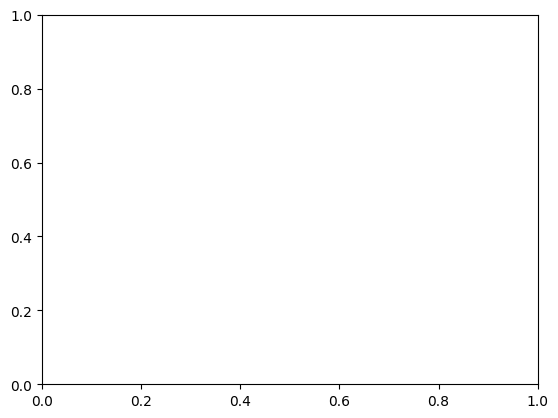

In [ ]:
from detectron2.data import DatasetCatalog
import random
from google.colab.patches import cv2_imshow  # Import the correct function

ig, ax = plt.subplots()
dataset_dict = random.choice(dataset_train)
im = Image.open(dataset_dict['file_name'])
ax.imshow(im)

for ann in dataset_dict['annotations']:
    x, y, w, h = ann['bbox']
    class_id = ann['category_id']
    class_name = metadata.thing_classes[class_id - 1]  # Get class name from metadata, COCO category_id starts from 1. Python list starts from 0

    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Use 'image_id' from the dataset_dict instead of ann
    text = f"ID: {dataset_dict['image_id']}, Class: {class_name}"
    ax.text(x, y, text, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [ ]:
import json

# Load the annotation file
with open('/content/split-dataset/coco_annotations/train_coco.json') as f:
    coco_data = json.load(f)

# Extract categories (classes)
categories = coco_data['categories']
num_classes = len(categories)  # Total number of classes in the subset
print(f"Number of classes: {num_classes}")

# Display the class names
class_names = [category['name'] for category in categories]
print(f"Class Names: {class_names}")


Number of classes: 7
Class Names: ['16  wireworm', '50  legume blister beetle', '86  prodenia litura', '14  grub', '45  flax budworm', '39  beet army worm', '22  corn borer']


In [ ]:
import logging
import torch
from collections import OrderedDict
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.solver import build_lr_scheduler, build_optimizer
from detectron2.checkpoint import DetectionCheckpointer, PeriodicCheckpointer
from detectron2.utils.events import EventStorage
from detectron2.modeling import build_model
import detectron2.utils.comm as comm
from detectron2.engine import default_argument_parser, default_setup, default_writers, launch
from detectron2.data import (
    MetadataCatalog,
    build_detection_test_loader,
    build_detection_train_loader,
    DatasetMapper
)
from detectron2.evaluation import (
    CityscapesInstanceEvaluator,
    CityscapesSemSegEvaluator,
    COCOEvaluator,
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    inference_on_dataset,
    print_csv_format,
)
from detectron2.structures import BitMasks, Boxes, PolygonMasks, BoxMode
# from detectron2.data.utils import polygons_to_bitmask #This import is causing the error
# Instead, use the function directly from detectron2.structures.PolygonMasks
# as the polygons_to_bitmask function has been absorbed into the PolygonMasks class.


from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
from detectron2.data import DatasetMapper
from detectron2.structures import BitMasks, PolygonMasks
import numpy as np
import torch

class CustomDatasetMapper(DatasetMapper):
    """
    A custom dataset mapper that generates pseudo-masks from bounding boxes
    if segmentation masks are not available in the dataset.
    """
    def __init__(self, cfg, is_train=True):
        super().__init__(cfg, is_train=is_train)

    def __call__(self, dataset_dict):
        dataset_dict = super().__call__(dataset_dict)  # Call the default mapper

        if "annotations" in dataset_dict:
            # Create a list to store pseudo-masks
            masks = []
            for anno in dataset_dict["annotations"]:
                if "segmentation" not in anno:  # If no segmentation mask
                    # Generate pseudo-mask from bounding box
                    x, y, w, h = anno["bbox"]
                    mask = np.zeros((dataset_dict["height"], dataset_dict["width"]), dtype=np.uint8)
                    mask[y:y + h, x:x + w] = 1  # Create rectangular mask
                    masks.append(mask)  # Add to list of masks
                else:
                    # If segmentation exists, convert to a format compatible with BitMasks
                    masks.append(anno["segmentation"])

            # Convert the list of masks to BitMasks
            if "instances" in dataset_dict:
                dataset_dict["instances"].gt_masks = BitMasks(torch.tensor(masks))

        return dataset_dict

In [ ]:
# In cell 36 where you are setting up your config file:
cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("asl_poly_train",)#Train dataset registered in a previous cell
cfg.DATASETS.TEST = ("asl_poly_test",)#Test dataset registered in a previous cell
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 10000 #We found that with a patience of 500, training will early stop before 10,000 iterations
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
# Original: cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # 26 letters plus one super class
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Set this to the actual number of classes in your dataset, the variable 'num_classes' was calculated in cell 49
cfg.TEST.EVAL_PERIOD = 0 # Increase this number if you want to monitor validation performance during training
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[32, 64, 128, 256, 512]]  # Adjust for pest sizes

PATIENCE = 500 #Early stopping will occur after N iterations of no imporovement in total_loss

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
# In cell 36 where you are setting up your config file:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("asl_poly_train",)  # Train dataset registered in a previous cell
cfg.DATASETS.TEST = ("asl_poly_test",)  # Test dataset registered in a previous cell
cfg.DATALOADER.NUM_WORKERS = 2
# Load weights pretrained on COCO, but exclude the final layers that are specific to COCO classes
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2

# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.MAX_ITER = 10000  # We found that with a patience of 500, training will early stop before 10,000 iterations

cfg.SOLVER.BASE_LR = 0.001  # Increased for batch size 2
cfg.SOLVER.MAX_ITER = 5000  # Train longer


cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
# **IMPORTANT:** Set NUM_CLASSES to the actual number of classes in your dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # num_classes should be calculated from your dataset annotations
cfg.TEST.EVAL_PERIOD = 0  # Increase this number if you want to monitor validation performance during training



cfg.MODEL.META_ARCHITECTURE = "GeneralizedRCNN"
cfg.MODEL.MASK_ON = False  # Disable mask head
PATIENCE = 500  # Early stopping will occur after N iterations of no improvement in total_loss

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
logger.info("Starting training from iteration {}".format(start_iter))
patience_counter = 0
with EventStorage(start_iter) as storage:
    for data, iteration in zip(data_loader, range(start_iter, max_iter)):
        storage.iter = iteration

        loss_dict = model(data)
        losses = sum(loss_dict.values())
        assert torch.isfinite(losses).all(), loss_dict

        loss_dict_reduced = {k: v.item() for k, v in comm.reduce_dict(loss_dict).items()}
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())
        if comm.is_main_process():
            storage.put_scalars(total_loss=losses_reduced, **loss_dict_reduced)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        storage.put_scalar("lr", optimizer.param_groups[0]["lr"], smoothing_hint=False)
        scheduler.step()

        if (
            cfg.TEST.EVAL_PERIOD > 0
            and (iteration + 1) % cfg.TEST.EVAL_PERIOD == 0
            and iteration != max_iter - 1
        ):
            do_test(cfg, model)
            comm.synchronize()

        if iteration - start_iter > 5 and (
            (iteration + 1) % 20 == 0 or iteration == max_iter - 1
        ):
            for writer in writers:
                writer.write()
        periodic_checkpointer.step(iteration)

        if iteration > prev_iter:
            prev_iter = iteration
            if losses_reduced < BEST_LOSS:
                BEST_LOSS = losses_reduced
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter % 100 == 0:
                    print(f"Loss has not improved for {patience_counter} iterations")
                if patience_counter >= PATIENCE:
                    print(f"EARLY STOPPING")
                    break

do_test(cfg, model)

# Set the best model as the final model for subsequent inference
best_model_path = os.path.join(cfg.OUTPUT_DIR, "model_best.pth")
if os.path.exists(best_model_path):
    os.replace(best_model_path, os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))

NameError: name 'logger' is not defined

In [ ]:
!rm -r /content/output/

In [ ]:
from detectron2.utils.events import TensorboardXWriter

def get_evaluator(cfg, dataset_name, output_folder=None):
    """
    Create evaluator(s) for a given dataset.
    This uses the special metadata "evaluator_type" associated with each builtin dataset.
    For your own dataset, you can simply create an evaluator manually in your
    script and do not have to worry about the hacky if-else logic here.
    """
    if output_folder is None:
        output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
    evaluator_list = []
    evaluator_type = MetadataCatalog.get(dataset_name).evaluator_type
    if evaluator_type in ["sem_seg", "coco_panoptic_seg"]:
        evaluator_list.append(
            SemSegEvaluator(
                dataset_name,
                distributed=True,
                output_dir=output_folder,
            )
        )
    if evaluator_type in ["coco", "coco_panoptic_seg"]:
        evaluator_list.append(COCOEvaluator(dataset_name, output_dir=output_folder))
    if evaluator_type == "coco_panoptic_seg":
        evaluator_list.append(COCOPanopticEvaluator(dataset_name, output_folder))
    if evaluator_type == "cityscapes_instance":
        return CityscapesInstanceEvaluator(dataset_name)
    if evaluator_type == "cityscapes_sem_seg":
        return CityscapesSemSegEvaluator(dataset_name)
    if evaluator_type == "pascal_voc":
        return PascalVOCDetectionEvaluator(dataset_name)
    if evaluator_type == "lvis":
        return LVISEvaluator(dataset_name, cfg, True, output_folder)
    if len(evaluator_list) == 0:
        raise NotImplementedError(
            "no Evaluator for the dataset {} with the type {}".format(dataset_name, evaluator_type)
        )
    if len(evaluator_list) == 1:
        return evaluator_list[0]
    return DatasetEvaluators(evaluator_list)

def do_test(cfg, model):
    results = OrderedDict()
    for dataset_name in cfg.DATASETS.TEST:
        data_loader = build_detection_test_loader(cfg, dataset_name)
        evaluator = get_evaluator(
            cfg, dataset_name, os.path.join(cfg.OUTPUT_DIR, "inference", dataset_name)
        )
        results_i = inference_on_dataset(model, data_loader, evaluator)
        results[dataset_name] = results_i
        if comm.is_main_process():
            logger.info("Evaluation results for {} in csv format:".format(dataset_name))
            print_csv_format(results_i)
    if len(results) == 1:
        results = list(results.values())[0]
    return results


logger = logging.getLogger("detectron2")
resume=False
model = build_model(cfg)
optimizer = build_optimizer(cfg, model)
scheduler = build_lr_scheduler(cfg, optimizer)

BEST_LOSS = np.inf

checkpointer = DetectionCheckpointer(
    model, cfg.OUTPUT_DIR, optimizer=optimizer, scheduler=scheduler
)
start_iter = (
    checkpointer.resume_or_load(cfg.MODEL.WEIGHTS, resume=resume).get("iteration", -1) + 1
)
prev_iter = start_iter
max_iter = cfg.SOLVER.MAX_ITER

periodic_checkpointer = PeriodicCheckpointer(
    checkpointer, cfg.SOLVER.CHECKPOINT_PERIOD, max_iter=max_iter
)

writers = default_writers(cfg.OUTPUT_DIR, max_iter) if comm.is_main_process() else []
#######
writers = [TensorboardXWriter(cfg.OUTPUT_DIR)]

# compared to "train_net.py", we do not support accurate timing and
# precise BN here, because they are not trivial to implement in a small training loop
# data_loader = build_detection_train_loader(cfg)
# data_loader = build_detection_train_loader(cfg, mapper=CustomDatasetMapper())
# data_loader = build_detection_train_loader(cfg, mapper=CustomDatasetMapper(cfg, is_train=True))  # Pass cfg and is_train=True
data_loader = build_detection_train_loader(cfg, mapper=CustomDatasetMapper(cfg, is_train=True))  # Pass cfg and is_train=True

logger.info("Starting training from iteration {}".format(start_iter))
patience_counter = 0
with EventStorage(start_iter) as storage:
    for data, iteration in zip(data_loader, range(start_iter, max_iter)):
        storage.iter = iteration

        loss_dict = model(data)
        losses = sum(loss_dict.values())
        assert torch.isfinite(losses).all(), loss_dict

        loss_dict_reduced = {k: v.item() for k, v in comm.reduce_dict(loss_dict).items()}
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())
        if comm.is_main_process():
            storage.put_scalars(total_loss=losses_reduced, **loss_dict_reduced)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        storage.put_scalar("lr", optimizer.param_groups[0]["lr"], smoothing_hint=False)
        scheduler.step()

        if (
            cfg.TEST.EVAL_PERIOD > 0
            and (iteration + 1) % cfg.TEST.EVAL_PERIOD == 0
            and iteration != max_iter - 1
        ):
            do_test(cfg, model)
            # Compared to "train_net.py", the test results are not dumped to EventStorage
            comm.synchronize()

        if iteration - start_iter > 5 and (
            (iteration + 1) % 20 == 0 or iteration == max_iter - 1
        ):
            for writer in writers:
                writer.write()
        periodic_checkpointer.step(iteration)

        if iteration > prev_iter:
            prev_iter = iteration
            if losses_reduced < BEST_LOSS:
                BEST_LOSS = losses_reduced
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter % 100 == 0:
                    print(f"Loss has not improved for {patience_counter} iterations")
                if patience_counter >= PATIENCE:
                    print(f"EARLY STOPPING")
                    break

do_test(cfg, model)

# Set the best model as the final model for subsequent inference
best_model_path = os.path.join(cfg.OUTPUT_DIR, "model_best.pth")
if os.path.exists(best_model_path):


SyntaxError: incomplete input (<ipython-input-9-7c96913d485f>, line 145)

In [ ]:
cfg = get_cfg()

# Option 1: Use correct Cascade R-CNN path
cfg.merge_from_file(model_zoo.get_config_file("Misc/cascade_mask_rcnn_R_50_FPN_3x.yaml"))

# Option 2: Use Faster R-CNN if Cascade not available
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Verify available configs
print("Available configs:", model_zoo.get_config_file_names("COCO-Detection"))

AttributeError: module 'detectron2.model_zoo' has no attribute 'get_config_file_names'

In [ ]:
!pip install pyyaml==5.1 detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import os
import random
import numpy as np
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_train_loader
from detectron2.data import detection_utils as utils
from detectron2.data import transforms as T
from detectron2.data.samplers import RepeatFactorTrainingSampler
from detectron2.engine import DefaultTrainer, default_argument_parser, default_setup, launch
from detectron2.evaluation import COCOEvaluator, DatasetEvaluators
from detectron2.utils.logger import setup_logger
from detectron2.utils.events import TensorboardXWriter
from detectron2.engine.hooks import EvalHook
from detectron2.data.datasets import register_coco_instances

In [ ]:
# Install requirements if needed
# !pip install pyyaml==5.1 detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
# !pip install tensorboard

import os
import random
import numpy as np
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_train_loader
from detectron2.data import detection_utils as utils
from detectron2.data import transforms as T
from detectron2.data.samplers import RepeatFactorTrainingSampler
from detectron2.engine import DefaultTrainer, default_argument_parser, default_setup, launch
from detectron2.evaluation import COCOEvaluator, DatasetEvaluators
from detectron2.utils.logger import setup_logger
from detectron2.utils.events import TensorboardXWriter
from detectron2.engine.hooks import EvalHook  # Import EvalHook from the correct location

# ----------------------
# 1. Dataset Registration
# ----------------------
# Unregister existing datasets
for name in ["asl_poly_train", "asl_poly_val", "asl_poly_test"]:
    if name in DatasetCatalog.list():
        DatasetCatalog.remove(name)
        MetadataCatalog.remove(name)


# Now register with the correct paths
register_coco_instances("asl_poly_train", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")# register_coco_instances("asl_poly_valid", {}, f"content/paddy-pest-3/valid/_annotations.coco.json", f"content/paddy-pest-3/valid")
register_coco_instances("asl_poly_valid", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")
register_coco_instances("asl_poly_test", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")



# Register your datasets (update paths accordingly)
# register_coco_instances("asl_poly_train", {}, "/content/dataset/train_annotations.json", "/content/dataset/train")
# register_coco_instances("asl_poly_val", {}, "/content/dataset/val_annotations.json", "/content/dataset/val")
# register_coco_instances("asl_poly_test", {}, "/content/dataset/test_annotations.json", "/content/dataset/test")

# ----------------------
# 2. Configuration Setup
# ----------------------
# cfg = get_cfg()

# # Use Cascade R-CNN for better performance
# # cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/cascade_rcnn_R_50_FPN_3x.yaml"))
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# # Basic configuration
# cfg.DATASETS.TRAIN = ("asl_poly_train",)
# cfg.DATASETS.TEST = ("asl_poly_test",)
# cfg.DATALOADER.NUM_WORKERS = 4
# cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# # Input resolution
# cfg.INPUT.MIN_SIZE_TRAIN = (1024,)
# cfg.INPUT.MAX_SIZE_TRAIN = 1333
# cfg.INPUT.MIN_SIZE_TEST = 1024
# cfg.INPUT.MAX_SIZE_TEST = 1333

# # Anchor customization
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[32, 64, 128]]  # For small objects
# cfg.MODEL.RPN.IN_FEATURES = ["p2", "p3", "p4"]

# # Training parameters
# cfg.SOLVER.IMS_PER_BATCH = 4
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.MAX_ITER = 5000
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.CHECKPOINT_PERIOD = 500

# # Model heads
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # Verify this matches your dataset!
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05


# ----------------------
# Configuration
# ----------------------

cfg.DATASETS.TRAIN = ("asl_poly_train",)
cfg.DATASETS.TEST = ("asl_poly_test",)
# 2. Configuration Setup
# ----------------------
cfg = get_cfg()  # Initialize FIRST before modifying

# Use Faster R-CNN config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Basic configuration
cfg.DATASETS.TRAIN = ("asl_poly_train",)
cfg.DATASETS.TEST = ("asl_poly_test",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Input resolution
cfg.INPUT.MIN_SIZE_TRAIN = (1024,)
cfg.INPUT.MAX_SIZE_TRAIN = 1333
cfg.INPUT.MIN_SIZE_TEST = 1024
cfg.INPUT.MAX_SIZE_TEST = 1333

# Anchor customization
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[32, 64, 128]]  # For small objects
cfg.MODEL.RPN.IN_FEATURES = ["p2", "p3", "p4"]

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.STEPS = (3000, 4000)

# Model parameters
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # Must match your dataset
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05

# Initialize weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
# ----------------------



# ----------------------
# Enhanced Configuration
# # ----------------------
# cfg = get_cfg()

# # 1. Anchor Optimization
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64, 128]]  # Smaller anchors for tiny objects
# cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.25, 0.5, 1.0, 2.0, 4.0]]  # Wider aspect ratios

# # 2. Multi-Scale Feature Extraction
# cfg.INPUT.MIN_SIZE_TRAIN = (640, 800, 1024)  # Multi-scale training
# cfg.INPUT.MIN_SIZE_TEST = 512
# cfg.MODEL.RPN.FPN_POST_NMS_TOPK_TRAIN = 2000  # Keep more proposals
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01  # Lower confidence threshold

# # 3. Transfer Learning & Fine-Tuning
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")  # Larger backbone
# cfg.SOLVER.BASE_LR = 0.0001  # Smaller learning rate for fine-tuning
# cfg.MODEL.BACKBONE.FREEZE_AT = 1  # Freeze first backbone stage

# # 4. Post-Processing Adjustments
# cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.4  # Original: 0.5
# cfg.MODEL.ROI_HEADS.DETECTIONS_PER_IMAGE = 300  # Original: 100

# # Dataset Configuration
# cfg.DATASETS.TRAIN = ("asl_poly_train",)
# cfg.DATASETS.TEST = ("asl_poly_test",)
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8
# cfg.MODEL.MASK_ON = False  # Disable mask head






# 3. Custom Data Augmentation
# ----------------------
class CustomAugmentations:
    def __call__(self, dataset_dict):
        image = utils.read_image(dataset_dict["file_name"], format="BGR")

        augs = T.AugmentationList([
            T.RandomFlip(horizontal=True, vertical=False),
            T.RandomRotation(angle=[-15, 15]),
            T.RandomCrop("absolute", (640, 640)),
            T.RandomLighting(0.7),
            T.RandomContrast(0.5, 1.5),
            T.ResizeShortestEdge(short_edge_length=(1024, 1024), max_size=1333, sample_style='choice'),
        ])

        input = T.AugInput(image)
        transforms = augs(input)
        image = input.image

        dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

        annos = [
            utils.transform_instance_annotations(annotation, transforms, image.shape[:2])
            for annotation in dataset_dict.pop("annotations")
        ]
        instances = utils.annotations_to_instances(annos, image.shape[:2])
        dataset_dict["instances"] = utils.filter_empty_instances(instances)
        return dataset_dict

# ----------------------
# 4. Class-Balanced Sampler
# ----------------------
def get_class_balance_repeats(dataset_name):
    dataset_dicts = DatasetCatalog.get(dataset_name)
    class_counts = {i: 0 for i in range(cfg.MODEL.ROI_HEADS.NUM_CLASSES)}

    for entry in dataset_dicts:
        for anno in entry["annotations"]:
            # Directly use category_id (assuming 0-based in your dataset)
            category_id = anno["category_id"]
            if 0 <= category_id < cfg.MODEL.ROI_HEADS.NUM_CLASSES:
                class_counts[category_id] += 1
            else:
                print(f"Invalid category ID {category_id} in annotation")

    # Adjust repeat factors based on your class distribution
    repeat_factors = {
        6: 3.0,  # beet_army_worm (ID 6)
        1: 2.0,  # locustoidea (ID 1)
        # Add other class adjustments
    }

    repeat_tensor = [repeat_factors.get(i, 1.0) for i in range(cfg.MODEL.ROI_HEADS.NUM_CLASSES)]
    return torch.tensor(repeat_tensor, dtype=torch.float32)


# ----------------------
# 5. Custom Trainer Class
# ----------------------
class BalancedPestTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        repeat_factors = get_class_balance_repeats(cfg.DATASETS.TRAIN[0])
        sampler = RepeatFactorTrainingSampler(repeat_factors)
        return build_detection_train_loader(
            cfg,
            mapper=CustomAugmentations(),
            sampler=sampler
        )

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, output_dir=output_folder)

    def build_hooks(self):
        hooks = super().build_hooks()

        # Replace early stopping hook
        hooks = [h for h in hooks if not isinstance(h, EvalHook)]  # Use the imported EvalHook

        hooks.insert(
            -1,
            EvalHook(
                cfg.TEST.EVAL_PERIOD,  # Pass eval_period directly
                lambda: self.test(self.cfg, self.model),
            )
        )
        return hooks

# ----------------------
# 6. Training Execution
# ----------------------
def main():
    setup_logger()

    # Initialize trainer
    trainer = BalancedPestTrainer(cfg)
    trainer.resume_or_load(resume=False)

    # Setup TensorBoard
    writers = [TensorboardXWriter(cfg.OUTPUT_DIR)]

    # Training loop with mAP-based early stopping
    BEST_MAP = 0.0
    PATIENCE = 5  # Number of validation checks
    patience_counter = 0

    with EventStorage() as storage:
        trainer.train()  # Use built-in training loop

        # Manual validation checks
        for iteration in range(0, cfg.SOLVER.MAX_ITER, 250):
            if iteration == 0: continue

            # Run validation
            val_results = trainer.test(cfg, trainer.model,
                                    #  evaluators=DatasetEvaluators([COCOEvaluator("asl_poly_val")]))
                                     evaluators=DatasetEvaluators([COCOEvaluator("asl_poly_val", output_dir=cfg.OUTPUT_DIR)]))  # Pass output_dir

            current_map = val_results["bbox"]["AP"]

            # Early stopping logic
            if current_map > BEST_MAP:
                BEST_MAP = current_map
                patience_counter = 0
                trainer.checkpointer.save("model_best")
            else:
                patience_counter += 1
                if patience_counter >= PATIENCE:
                    print(f"Early stopping at iteration {iteration}")
                    break

    # Final test evaluation
    print("Final evaluation on test set:")
    trainer.test(cfg, trainer.model, evaluators=DatasetEvaluators([COCOEvaluator("asl_poly_test")]))


if __name__ == "__main__":
    main()

[02/10 00:11:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  backbone.bottom_up.res4.6.conv1.weight
  backbone.bottom_up.res4.6.conv1.norm.{bias, running_mean, running_var, weight}
  backbone.bottom_up.res4.6.conv2.weight
  backbone.bottom_up.res4.6.conv2.norm.{bias, running_mean, running_var, weight}
  backbone.bottom_up.res4.6.conv3.weight
  backbone.bottom_up.res4.6.conv3.norm.{bias

[02/10 00:11:15 d2.engine.train_loop]: Starting training from iteration 0
ERROR [02/10 00:11:17 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/defaults.py", line 530, in run_step
    self._trainer.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 310, in run_step
    loss_dict = self.model(data)
                ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lo

OutOfMemoryError: CUDA out of memory. Tried to allocate 12.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 579443 has 14.74 GiB memory in use. Of the allocated memory 14.60 GiB is allocated by PyTorch, and 20.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
!pip uninstall -y tensorboard tb-nightly &&
!pip install tb-nightly  # must have at least tb-nightly==2.5.0a20210316

/bin/bash: -c: line 2: syntax error: unexpected end of file


tune


In [ ]:
# Install requirements if needed
# !pip install pyyaml==5.1 detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
# !pip install tensorboard

import os
import random
import numpy as np
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_train_loader
from detectron2.data import detection_utils as utils
from detectron2.data import transforms as T
from detectron2.data.samplers import RepeatFactorTrainingSampler
from detectron2.engine import DefaultTrainer, default_argument_parser, default_setup, launch
from detectron2.evaluation import COCOEvaluator, DatasetEvaluators
from detectron2.utils.logger import setup_logger
from detectron2.utils.events import TensorboardXWriter
from detectron2.engine.hooks import EvalHook  # Import EvalHook from the correct location

# ----------------------
# 1. Dataset Registration
# ----------------------
# Unregister existing datasets
for name in ["asl_poly_train", "asl_poly_val", "asl_poly_test"]:
    if name in DatasetCatalog.list():
        DatasetCatalog.remove(name)
        MetadataCatalog.remove(name)


# Now register with the correct paths
register_coco_instances("asl_poly_train", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")# register_coco_instances("asl_poly_valid", {}, f"content/paddy-pest-3/valid/_annotations.coco.json", f"content/paddy-pest-3/valid")
register_coco_instances("asl_poly_valid", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")
register_coco_instances("asl_poly_test", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")



# Register your datasets (update paths accordingly)
# register_coco_instances("asl_poly_train", {}, "/content/dataset/train_annotations.json", "/content/dataset/train")
# register_coco_instances("asl_poly_val", {}, "/content/dataset/val_annotations.json", "/content/dataset/val")
# register_coco_instances("asl_poly_test", {}, "/content/dataset/test_annotations.json", "/content/dataset/test")

# ----------------------
# 2. Configuration Setup
# ----------------------
# cfg = get_cfg()

# # Use Cascade R-CNN for better performance
# # cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/cascade_rcnn_R_50_FPN_3x.yaml"))
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# # Basic configuration
# cfg.DATASETS.TRAIN = ("asl_poly_train",)
# cfg.DATASETS.TEST = ("asl_poly_test",)
# cfg.DATALOADER.NUM_WORKERS = 4
# cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# # Input resolution
# cfg.INPUT.MIN_SIZE_TRAIN = (1024,)
# cfg.INPUT.MAX_SIZE_TRAIN = 1333
# cfg.INPUT.MIN_SIZE_TEST = 1024
# cfg.INPUT.MAX_SIZE_TEST = 1333

# # Anchor customization
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[32, 64, 128]]  # For small objects
# cfg.MODEL.RPN.IN_FEATURES = ["p2", "p3", "p4"]

# # Training parameters
# cfg.SOLVER.IMS_PER_BATCH = 4
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.MAX_ITER = 5000
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.CHECKPOINT_PERIOD = 500

# # Model heads
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # Verify this matches your dataset!
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05


# ----------------------
# Configuration
# ----------------------

cfg.DATASETS.TRAIN = ("asl_poly_train",)
cfg.DATASETS.TEST = ("asl_poly_test",)
# 2. Configuration Setup
# ----------------------
cfg = get_cfg()  # Initialize FIRST before modifying

# Use Faster R-CNN config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Basic configuration
cfg.DATASETS.TRAIN = ("asl_poly_train",)
cfg.DATASETS.TEST = ("asl_poly_test",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Input resolution
cfg.INPUT.MIN_SIZE_TRAIN = (1024,)
cfg.INPUT.MAX_SIZE_TRAIN = 1333
cfg.INPUT.MIN_SIZE_TEST = 1024
cfg.INPUT.MAX_SIZE_TEST = 1333

# Anchor customization
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64]]  # For small objects
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.25, 0.5, 1.0, 2.0, 4.0]]

cfg.MODEL.RPN.IN_FEATURES = ["p2", "p3", "p4"]

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 10000
cfg.SOLVER.STEPS = (3000, 4000)

# Model parameters
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # Must match your dataset
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.3

cfg.MODEL.FPN.OUT_CHANNELS = 512  # Increased from 256
cfg.MODEL.RPN.FPN_POST_NMS_TOPK_TRAIN = 2000


cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.3  # Lower threshold
cfg.MODEL.ROI_HEADS.DETECTIONS_PER_IMAGE = 300

# # Initialize weights
# # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
# # ----------------------
# # Input & Anchors
# cfg.INPUT.MIN_SIZE_TRAIN = (1024,)
# cfg.INPUT.MAX_SIZE_TRAIN = 1333
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64]]

# # Optimization
# cfg.SOLVER.BASE_LR = 0.0001
# cfg.SOLVER.MAX_ITER = 10000
# cfg.SOLVER.STEPS = (5000, 7500)

# # Post-processing
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01
# cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.3


# ----------------------
# Enhanced Configuration
# # ----------------------
# cfg = get_cfg()

# # 1. Anchor Optimization
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64, 128]]  # Smaller anchors for tiny objects
# cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.25, 0.5, 1.0, 2.0, 4.0]]  # Wider aspect ratios

# # 2. Multi-Scale Feature Extraction
# cfg.INPUT.MIN_SIZE_TRAIN = (640, 800, 1024)  # Multi-scale training
# cfg.INPUT.MIN_SIZE_TEST = 512
# cfg.MODEL.RPN.FPN_POST_NMS_TOPK_TRAIN = 2000  # Keep more proposals
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01  # Lower confidence threshold

# # 3. Transfer Learning & Fine-Tuning
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")  # Larger backbone
# cfg.SOLVER.BASE_LR = 0.0001  # Smaller learning rate for fine-tuning
# cfg.MODEL.BACKBONE.FREEZE_AT = 1  # Freeze first backbone stage

# # 4. Post-Processing Adjustments
# cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.4  # Original: 0.5
# cfg.MODEL.ROI_HEADS.DETECTIONS_PER_IMAGE = 300  # Original: 100

# # Dataset Configuration
# cfg.DATASETS.TRAIN = ("asl_poly_train",)
# cfg.DATASETS.TEST = ("asl_poly_test",)
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8
# cfg.MODEL.MASK_ON = False  # Disable mask head






# 3. Custom Data Augmentation
# ----------------------
class CustomAugmentations:
    def __call__(self, dataset_dict):
        image = utils.read_image(dataset_dict["file_name"], format="BGR")

        augs = T.AugmentationList([
            T.RandomFlip(horizontal=True, vertical=False),
            T.RandomRotation(angle=[-15, 15]),
            T.RandomCrop("absolute", (640, 640)),
            T.RandomLighting(0.7),
            T.RandomContrast(0.5, 1.5),
            T.ResizeShortestEdge(short_edge_length=(1024, 1024), max_size=1333, sample_style='choice'),
        ])

        input = T.AugInput(image)
        transforms = augs(input)
        image = input.image

        dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

        annos = [
            utils.transform_instance_annotations(annotation, transforms, image.shape[:2])
            for annotation in dataset_dict.pop("annotations")
        ]
        instances = utils.annotations_to_instances(annos, image.shape[:2])
        dataset_dict["instances"] = utils.filter_empty_instances(instances)
        return dataset_dict

# ----------------------
# 4. Class-Balanced Sampler
# ----------------------
def get_class_balance_repeats(dataset_name):
    dataset_dicts = DatasetCatalog.get(dataset_name)
    class_counts = {i: 0 for i in range(cfg.MODEL.ROI_HEADS.NUM_CLASSES)}

    for entry in dataset_dicts:
        for anno in entry["annotations"]:
            # Directly use category_id (assuming 0-based in your dataset)
            category_id = anno["category_id"]
            if 0 <= category_id < cfg.MODEL.ROI_HEADS.NUM_CLASSES:
                class_counts[category_id] += 1
            else:
                print(f"Invalid category ID {category_id} in annotation")

    # Adjust repeat factors based on your class distribution
    repeat_factors = {
        # 6: 3.0,  # beet_army_worm (ID 6)
        # 1: 2.0,  # locustoidea (ID 1)
        # # Add other class adjustments

        6: 5.0,  # beet_army_worm (class_id=6)
        1: 3.0,  # locustoidea
        5: 2.0   # flax_budworm
    }

    repeat_tensor = [repeat_factors.get(i, 1.0) for i in range(cfg.MODEL.ROI_HEADS.NUM_CLASSES)]
    return torch.tensor(repeat_tensor, dtype=torch.float32)


# ----------------------
# 5. Custom Trainer Class
# ----------------------
class BalancedPestTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        repeat_factors = get_class_balance_repeats(cfg.DATASETS.TRAIN[0])
        sampler = RepeatFactorTrainingSampler(repeat_factors)
        return build_detection_train_loader(
            cfg,
            mapper=CustomAugmentations(),
            sampler=sampler
        )

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, output_dir=output_folder)

    def build_hooks(self):
        hooks = super().build_hooks()

        # Replace early stopping hook
        hooks = [h for h in hooks if not isinstance(h, EvalHook)]  # Use the imported EvalHook

        hooks.insert(
            -1,
            EvalHook(
                cfg.TEST.EVAL_PERIOD,  # Pass eval_period directly
                lambda: self.test(self.cfg, self.model),
            )
        )
        return hooks

# ----------------------
# 6. Training Execution
# ----------------------
def main():
    setup_logger()

    # Initialize trainer
    trainer = BalancedPestTrainer(cfg)
    trainer.resume_or_load(resume=False)

    # Setup TensorBoard
    writers = [TensorboardXWriter(cfg.OUTPUT_DIR)]

    # Training loop with mAP-based early stopping
    BEST_MAP = 0.0
    PATIENCE = 5  # Number of validation checks
    patience_counter = 0

    with EventStorage() as storage:
        trainer.train()  # Use built-in training loop

        # Manual validation checks
        for iteration in range(0, cfg.SOLVER.MAX_ITER, 250):
            if iteration == 0: continue

            # Run validation
            val_results = trainer.test(cfg, trainer.model,
                                    #  evaluators=DatasetEvaluators([COCOEvaluator("asl_poly_val")]))
                                     evaluators=DatasetEvaluators([COCOEvaluator("asl_poly_val", output_dir=cfg.OUTPUT_DIR)]))  # Pass output_dir

            current_map = val_results["bbox"]["AP"]

            # Early stopping logic
            if current_map > BEST_MAP:
                BEST_MAP = current_map
                patience_counter = 0
                trainer.checkpointer.save("model_best")
            else:
                patience_counter += 1
                if patience_counter >= PATIENCE:
                    print(f"Early stopping at iteration {iteration}")
                    break

    # Final test evaluation
    print("Final evaluation on test set:")
    trainer.test(cfg, trainer.model, evaluators=DatasetEvaluators([COCOEvaluator("asl_poly_test")]))


if __name__ == "__main__":
    main()

[02/10 00:31:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.weight
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_head

[02/10 00:31:39 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/10 00:32:36 d2.utils.events]:  eta: 7:46:49  iter: 19  total_loss: 8.23  loss_cls: 2.205  loss_box_reg: 1.231e-05  loss_rpn_cls: 0.7698  loss_rpn_loc: 5.251    time: 2.7988  last_time: 2.8982  data_time: 0.1229  last_data_time: 0.0957   lr: 1.9981e-06  max_mem: 9778M
[02/10 00:33:39 d2.utils.events]:  eta: 7:54:26  iter: 39  total_loss: 8.271  loss_cls: 2.187  loss_box_reg: 1.238e-05  loss_rpn_cls: 0.768  loss_rpn_loc: 5.336    time: 2.8577  last_time: 2.9785  data_time: 0.0750  last_data_time: 0.0298   lr: 3.9961e-06  max_mem: 9778M
[02/10 00:34:37 d2.utils.events]:  eta: 7:57:46  iter: 59  total_loss: 8.046  loss_cls: 2.142  loss_box_reg: 1.133e-05  loss_rpn_cls: 0.7476  loss_rpn_loc: 5.132    time: 2.8723  last_time: 3.0695  data_time: 0.0803  last_data_time: 0.1226   lr: 5.9941e-06  max_mem: 9779M
[02/10 00:35:36 d2.utils.events]:  eta: 7:59:26  iter: 79  total_loss: 7.668  loss_cls: 2.069  loss_box_reg: 1.122e-05  loss_rpn_cls: 0.7267  loss_rpn_loc: 4.834    time: 2.8837  last

In [ ]:
# sess.graph contains the graph definition; that enables the Graph Visualizer.
import tensorflow as tf

file_writer = tf.summary.FileWriter('/content/output', sess.graph)

AttributeError: module 'tensorflow._api.v2.summary' has no attribute 'FileWriter'

In [ ]:
!tensorboard --logdir output/ --load_fast true

2025-02-09 23:52:30.673579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739145150.738702   46223 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739145150.763382   46223 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 23:52:30.799505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.19.0a2025020

In [ ]:
from detectron2.modeling.postprocessing import detector_postprocess

def custom_apply_nms(outputs, threshold=0.4, topk=200):
    """Soft Hybrid NMS for pest detection"""
    logits = outputs['instances'].scores
    boxes = outputs['instances'].pred_boxes.tensor

    # Custom NMS implementation
    keep_indices = batched_nms(
        boxes,
        logits,
        outputs['instances'].pred_classes,
        iou_threshold=threshold
    )

    # Apply confidence-based filtering
    keep_indices = keep_indices[logits[keep_indices] > 0.1]

    return outputs['instances'][keep_indices[:topk]]

In [ ]:
from detectron2.evaluation import COCOEvaluator
evaluator = COCOEvaluator("asl_poly_val", output_dir="./output")
print(evaluator.evaluate(predictions))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
from detectron2.utils.visualizer import Visualizer
from PIL import Image

# ... (your previous code to get predictions 'outputs') ...

# # Assuming dataset_dict is the dictionary for the image you want to visualize
# dataset_dict = random.choice(dataset_train)  # Or load your desired image here

# Load the image using PIL (or OpenCV)
img = Image.open(dataset_dict['file_name'])
img = np.array(img)  # Convert PIL Image to NumPy array

# Now you can use 'img' in the Visualizer
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
Image.fromarray(out.get_image())

NameError: name 'dataset_dict' is not defined

In [ ]:
from detectron2.utils.visualizer import Visualizer
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
Image.fromarray(out.get_image())

NameError: name 'img' is not defined

End of roboflow example

****** tempalte******

In [ ]:
# !pip uninstall -y tensorflow keras
!pip install tensorflow keras albumentations

In [ ]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install kaggle

In [ ]:
!git clone https://github.com/najafzade/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 955, done.
remote: Total 955 (delta 0), reused 0 (delta 0), pack-reused 955 (from 1)
Receiving objects: 100% (955/955), 137.67 MiB | 16.65 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [ ]:
import os
os.chdir('/content/Mask_RCNN/')

In [ ]:
# !cd /content/Mask_RCNN
!pwd

/content/Mask_RCNN


In [ ]:
!pip3 install -r requirements.txt


DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import os
os.chdir('/content/')

In [ ]:

%cd Mask_RCNN
!sed -i 's/import keras.engine as KE/from tensorflow.keras import layers as KE/' mrcnn/model.py
!sed -i 's/import keras.backend as K/from tensorflow.keras import backend as K/' mrcnn/model.py
!sed -i 's/import keras.layers as KL/from tensorflow.keras import layers as KL/' mrcnn/model.py
!sed -i 's/import keras.models as KM/from tensorflow.keras import models as KM/' mrcnn/model.py
!sed -i "s/if os.name is 'nt'/if os.name == 'nt'/" mrcnn/model.py
!sed -i 's/import tensorflow.keras.engine as KE/from tensorflow.keras import layers as KE/' mrcnn/model.py
!sed -i 's/import tensorflow.keras.engine as KE/from tensorflow.keras.layers import Layer as KE/' mrcnn/model.py
!sed -i 's/import tensorflow.keras.backend as K/from tensorflow.keras import backend as K/' mrcnn/model.py
!sed -i 's/import tensorflow.keras.layers as KL/from tensorflow.keras import layers as KL/' mrcnn/model.py
!sed -i 's/import tensorflow.keras.models as KM/from tensorflow.keras import models as KM/' mrcnn/model.py


/content/Mask_RCNN


In [ ]:

%cd Mask_RCNN
!sed -i 's/KL.Lambda(lambda x: tf.Variable(anchors), name="anchors")/KL.Lambda(lambda x: tf.Variable(anchors), name="anchors", output_shape=(None, None, 4))/' /content/Mask_RCNN/mrcnn/model.py


/content/Mask_RCNN


In [ ]:
%cd Mask_RCNN
!sed -i 's/K.shape(input_image)/tf.shape(input_image)/g' /content/Mask_RCNN/mrcnn/model.py


/content/Mask_RCNN


In [ ]:
!head -n 50 mrcnn/model.py


"""
Mask R-CNN
The main Mask R-CNN model implementation.

Copyright (c) 2017 Matterport, Inc.
Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla
"""

import os
import random
import datetime
import re
import math
import logging
from collections import OrderedDict
import multiprocessing
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers as KL
from tensorflow.keras import layers as KE
from tensorflow.keras import models as KM

from mrcnn import utils

# Requires TensorFlow 1.3+ and Keras 2.0.8+.
from distutils.version import LooseVersion
assert LooseVersion(tf.__version__) >= LooseVersion("1.3")
assert LooseVersion(keras.__version__) >= LooseVersion('2.0.8')


############################################################
#  Utility Functions
############################################################

def log(text, array=None):
    """Prints a text message. And, optionally, i

In [ ]:
!grep "import tensorflow.keras" mrcnn/model.py


In [ ]:
!python3 setup.py install

/content/Mask_RCNN/setup.py:9: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:452: Setuptoo

In [ ]:
import os
os._exit(00)

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
!pip install numpy==1.26.2


DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is i

In [ ]:
!pip install tensorflow==2.12 keras==2.12 numpy==1.23.5


In [ ]:
!git clone https://github.com/najafzade/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 955, done.
remote: Total 955 (delta 0), reused 0 (delta 0), pack-reused 955 (from 1)
Receiving objects: 100% (955/955), 137.67 MiB | 30.57 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [ ]:
%cd Mask_RCNN
!pip install -q .

/content/Mask_RCNN
  Preparing metadata (setup.py) ... done


In [ ]:
# !pip uninstall -y mask-rcnn


Found existing installation: mask-rcnn 2.1
Uninstalling mask-rcnn-2.1:
  Successfully uninstalled mask-rcnn-2.1


In [ ]:
!pip install git+https://github.com/akTwelve/Mask_RCNN.git


  Cloning https://github.com/akTwelve/Mask_RCNN.git to /tmp/pip-req-build-wn5few11
  Running command git clone --filter=blob:none --quiet https://github.com/akTwelve/Mask_RCNN.git /tmp/pip-req-build-wn5few11
  Resolved https://github.com/akTwelve/Mask_RCNN.git to commit d9f01dcd83b1e90e5ea0b4b6d5ba753770e114ac
  Preparing metadata (setup.py) ... done
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-py3-none-any.whl size=56909 sha256=ccc437254da093aebd16d2746aa64953b0fb39c2a325c7fa48289e13058dde65
  Stored in directory: /tmp/pip-ephem-wheel-cache-0y_y92o2/wheels/d6/4c/91/f27a91b109fbad9568a04921e5ccb92675b50c0f9835bde3bf
Successfully built mask-rcnn


In [ ]:
import os
os.chdir('/content/')

In [ ]:
# import os
# import sys
# import random
# import math
# import numpy as np
# import skimage.io
# import matplotlib
# import matplotlib.pyplot as plt

# # Root directory of the project
# # ROOT_DIR was set to /content, changing it to Mask_RCNN
# ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

# # Import Mask RCNN
# sys.path.append(ROOT_DIR)  # To find local version of the library
# from mrcnn import utils
# import mrcnn.model as modellib
# from mrcnn import visualize
# # Import COCO config
# # Using absolute path to coco.py
# sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
# import coco  # This should now import the coco.py file

# %matplotlib inline

# # Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# # Local path to trained weights file
# # COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")  # Original line
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5") # Modified line
# # Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)
#     print(f"Downloaded weights to: {COCO_MODEL_PATH}")
# else:
#     print(f"Weights file already exists at: {COCO_MODEL_PATH}")

# # Directory of images to run detection on
# IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Weights file already exists at: /content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
# Using absolute path to coco.py
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco  # This should now import the coco.py file

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    print(f"Downloaded weights to: {COCO_MODEL_PATH}")
else:
    print(f"Weights file already exists at: {COCO_MODEL_PATH}")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Weights file already exists at: /content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# import os
# import sys
# import random
# import math
# import json
# import numpy as np
# import cv2
# import matplotlib
# import matplotlib.pyplot as plt
# from pycocotools.coco import COCO

# # Root directory and Mask R-CNN imports
# ROOT_DIR = os.path.abspath("../../")
# sys.path.append(ROOT_DIR)
# from mrcnn.config import Config
# from mrcnn import utils
# import mrcnn.model as modellib
# from mrcnn import visualize

# %matplotlib inline

# # Paths (Update with your paths)
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# # Load your class info
# with open('/content/split-dataset/coco_annotations/train_coco.json') as f:
#     coco_data = json.load(f)
# NUM_CLASSES = len(coco_data['categories']) + 1  # +1 for background
# CLASS_NAMES = [c['name'] for c in coco_data['categories']]

In [ ]:
import json

# Load the annotation file
with open('/content/split-dataset/coco_annotations/train_coco.json') as f:
    coco_data = json.load(f)

# Extract categories (classes)
categories = coco_data['categories']
num_classes = len(categories)  # Total number of classes in the subset
print(f"Number of classes: {num_classes}")

# Display the class names
class_names = [category['name'] for category in categories]
print(f"Class Names: {class_names}")


Number of classes: 5
Class Names: ['48  locustoidea', '15  mole cricket', '51  blister beetle', '24  aphids', '101 cicadellidae']


In [ ]:
from mrcnn.config import Config  # Import Config from mrcnn.config

class YourDatasetConfig(Config):
    NAME = "your_dataset"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2  # Adjust based on GPU memory
    NUM_CLASSES = num_classes
    IMAGE_MIN_DIM = 512  # Adjust to your image size
    IMAGE_MAX_DIM = 512
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 5
    DETECTION_MIN_CONFIDENCE = 0.9

config = YourDatasetConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
class CocoLikeDataset(utils.Dataset):
    def load_dataset(self, annotation_json, images_dir):
        """Load a subset of the COCO dataset."""
        # Load COCO annotations
        self.coco = COCO(annotation_json)
        self.image_dir = images_dir

        # Add classes
        for category in self.coco.dataset['categories']:
            self.add_class("your_dataset", category['id']+1, category['name'])

        # Add images
        for image_id in self.coco.imgs:
            self.add_image(
                "your_dataset",
                image_id=image_id,
                path=os.path.join(images_dir, self.coco.imgs[image_id]['file_name']),
                width=self.coco.imgs[image_id]['width'],
                height=self.coco.imgs[image_id]['height'],
                annotations=self.coco.loadAnns(self.coco.getAnnIds(imgIds=image_id))
            )

    def load_mask(self, image_id):
        """Generate instance masks from bounding boxes."""
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']

        # Create one mask per instance
        masks = np.zeros([image_info['height'], image_info['width'], len(annotations)], dtype=np.uint8)

        for i, ann in enumerate(annotations):
            # Create mask from bbox (rectangle)
            x, y, w, h = ann['bbox']
            masks[y:y+h, x:x+w, i] = 1

        # Return masks and class IDs
        class_ids = np.array([a['category_id']+1 for a in annotations], dtype=np.int32)
        return masks.astype(bool), class_ids  # Use bool instead of np.bool

    def image_reference(self, image_id):
        """Return the path to the image."""
        return self.image_info[image_id]['path']

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


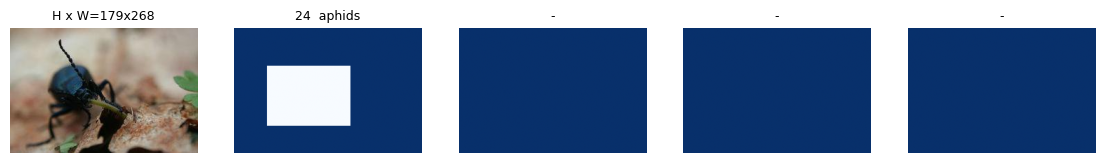

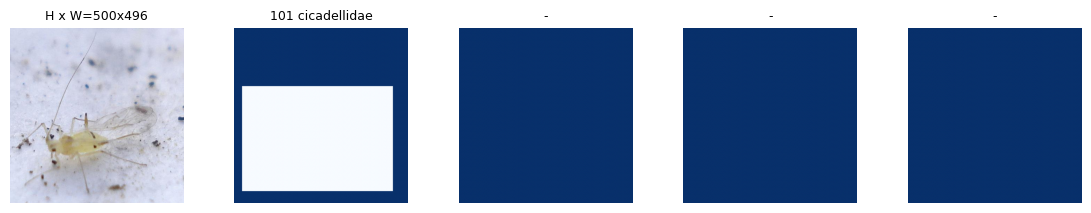

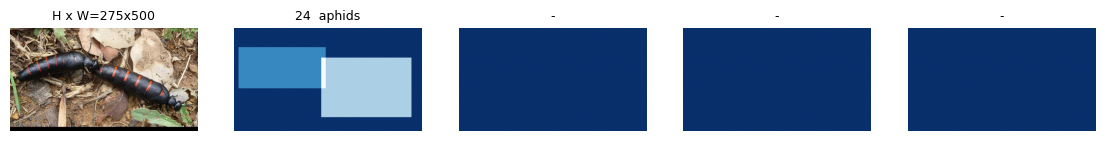

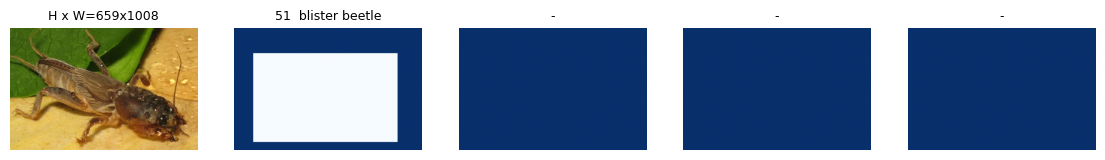

In [ ]:
# Training dataset
train_img_path = "/content/split-dataset/train/images"  # Define the path to your training images
train_anno_path = "/content/split-dataset/coco_annotations/train_coco.json"  # Define the path to your training annotations
dataset_train = CocoLikeDataset()
dataset_train.load_dataset(train_anno_path, train_img_path)
dataset_train.prepare()

# Validation dataset
val_img_path = "/content/split-dataset/test/images"  # Define the path to your validation images
val_anno_path = "/content/split-dataset/coco_annotations/test_coco.json"  # Define the path to your validation annotations
dataset_val = CocoLikeDataset()
dataset_val.load_dataset(val_anno_path, val_img_path)
dataset_val.prepare()

# Visualize samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
# Create model
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)

# Load COCO weights (exclude last layers)
model.load_weights(COCO_MODEL_PATH, by_name=True,
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                            "mrcnn_bbox", "mrcnn_mask"])

# Training - Stage 1 (Heads)
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=5,
            layers='heads')

# Training - Stage 2 (Fine-tune all layers)
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=10,
            layers="all")


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/your_dataset20250202T1406/mask_rcnn_your_dataset_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_d

In [ ]:
class InferenceConfig(YourDatasetConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Load trained weights
model_path = model.find_last()
model.load_weights(model_path, by_name=True)

# Run detection on validation image
image_id = random.choice(dataset_val.image_ids)
image = dataset_val.load_image(image_id)
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            CLASS_NAMES, r['scores'])

In [ ]:
# Compute mAP
APs = []
for image_id in dataset_val.image_ids:
    image, _, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, inference_config, image_id)
    results = model.detect([image], verbose=0)
    r = results[0]
    AP, _, _, _ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                  r['rois'], r['class_ids'], r['scores'], r['masks'])
    APs.append(AP)

print("mAP: ", np.mean(APs))

********************************************************end

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the classes.txt file


In [ ]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import json
import random
import matplotlib.pyplot as plt


# Load your custom class names from the COCO annotations file
with open('/content/split-dataset/coco_annotations/train_coco.json') as f:
    coco_data = json.load(f)

# Extract class names and add 'BG' as first class
CLASS_NAMES = ['BG'] + [category['name'] for category in coco_data['categories']]

class SimpleConfig(mrcnn.config.Config):
    NAME = "custom_inference"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = len(CLASS_NAMES)  # Now matches your custom dataset

# Path configuration
TEST_IMAGE_DIR = "/content/split-dataset/test/images"
MODEL_WEIGHTS_PATH = "/path/to/your/custom_weights.h5"  # Update this to your actual weights path

# Initialize the model
model = mrcnn.model.MaskRCNN(mode="inference",
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load custom weights (you'll need to train first)
model.load_weights(filepath=MODEL_WEIGHTS_PATH, by_name=True)

# Process all images in the test directory
for image_file in os.listdir(TEST_IMAGE_DIR):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Load image
        image_path = os.path.join(TEST_IMAGE_DIR, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform inference
        results = model.detect([image], verbose=0)[0]

        # Visualize results
        mrcnn.visualize.display_instances(
            image=image,
            boxes=results['rois'],
            masks=results['masks'],
            class_ids=results['class_ids'],
            class_names=CLASS_NAMES,
            scores=results['scores']
        )

******************* Implementing the Dataset Class for COCO Format************

In [ ]:
!pip install --no-binary detectron2 detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install torch torchvision detectron2

ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-661u_iz7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-661u_iz7
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
  Using cached yacs-0.1.8-py3-none-any.whl.metadata (639 bytes)
  Using cached fvcore-0.1.5.post20221221-py3-none-any.whl
  Using cached iopath-0.1.9-py3-none-any.whl.metadata (370 bytes)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached black-25.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (81 kB)
  Using cached antlr4_py

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import numpy as np
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.model_zoo import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset


RuntimeError: Detected that PyTorch and torchvision were compiled with different CUDA major versions. PyTorch has CUDA Version=11.8 and torchvision has CUDA Version=12.4. Please reinstall the torchvision that matches your PyTorch install.

****** rare class augmentation****


In [ ]:
import numpy as np
import torch
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader, WeightedRandomSampler
import albumentations as A
from albumentations.pytorch import ToTensorV2
from collections import defaultdict
from pycocotools.coco import COCO
from PIL import Image

# Step 1: Identify rare classes and compute class frequencies
def get_class_frequencies(annFile):
    coco = COCO(annFile)
    class_freq = defaultdict(int)
    for ann in coco.dataset['annotations']:
        category_id = ann['category_id']  # Original line
        if isinstance(category_id, str):  # Check if it's a string
            try:
                category_id = int(category_id)  # Try to convert to integer
            except ValueError:
                print(f"Warning: Could not convert category_id '{category_id}' to integer. Skipping this annotation.")
                continue  # Skip if conversion fails
        class_freq[category_id] += 1
    return class_freq

def get_rare_class_indices(dataset, rare_classes):
    rare_class_indices = []
    for idx in range(len(dataset)):
        _, target = dataset[idx]
        # Check if target is a dictionary or list and iterate accordingly
        if isinstance(target, dict):
            for ann in target.get('annotations', []):
                category_id = ann.get('category_id', None)
                if category_id is not None and isinstance(category_id, str):
                    try:
                        category_id = int(category_id)
                    except ValueError:
                        print(f"Warning: Could not convert category_id '{category_id}' to integer. Skipping this annotation.")
                        continue  # Skip if conversion fails
                if category_id is not None and category_id in rare_classes:
                    rare_class_indices.append(idx)
                    break
        elif isinstance(target, list):
            for ann in target:
                # Ensure category_id is treated as an integer
                category_id = ann.get('category_id', None)  # Get category_id and handle cases where it's missing
                if category_id is not None and isinstance(category_id, str):  # Check if it's a string
                    try:
                        category_id = int(category_id)  # Try to convert to integer
                    except ValueError:
                        print(f"Warning: Could not convert category_id '{category_id}' to integer. Skipping this annotation.")
                        continue  # Skip if conversion fails
                if category_id is not None and category_id in rare_classes:
                    rare_class_indices.append(idx)
                    break
        else:
            print(f"Warning: Unexpected target type at index {idx}. Expected dict or list, got {type(target)}.")
    return rare_class_indices

# Step 2: Define augmentations with rare-class targeting
def get_augmentations(train=True, rare_class=False):
    base_augmentations = [
        A.LongestMaxSize(max_size=1920),
        A.PadIfNeeded(min_height=1080, min_width=1920),
        A.RandomCrop(width=1280, height=720, p=0.5),
        A.Rotate(limit=20, p=0.7, border_mode=0),
        A.HorizontalFlip(p=0.4),
        A.VerticalFlip(p=0.3),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.GaussNoise(var_limit=(10, 50), p=0.5),
        ], p=0.5),
        ToTensorV2(),
    ]
    if rare_class:
        # Add additional augmentations for rare classes, adjusting parameters
        base_augmentations.extend([
            # Reduce max_holes, max_height, and max_width to avoid errors
            # Ensure max_height and max_width are smaller than the image size
            # but larger than min_area
            # Updated max_height and max_width to be much smaller (e.g., 32)
            A.CoarseDropout(max_holes=2, max_height=32, max_width=32, fill_value=0, mask_fill_value=0, p=0.5),
            A.Lambda(image=lambda img, **kwargs: img if img.ndim == 3 and img.shape[2] == 3 else np.stack((img,) * 3, axis=-1), always_apply=True),
            A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=0.5),
        ])
    if train:
        # Adjust min_area in BboxParams if necessary
        transform = A.Compose(base_augmentations, bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.3, label_fields=["category_ids"]))
    else:
        transform = A.Compose([ToTensorV2()])
    return transform


# Step 3: Modify dataset class to handle rare-class sampling and targeted augmentations
class AugmentedCocoDetection(CocoDetection):
    def __init__(self, root, annFile, transform=None, rare_classes=None):
        super().__init__(root, annFile)
        self.transform = transform
        self.rare_classes = rare_classes if rare_classes else set()

    def __getitem__(self, index):
        img, target = super().__getitem__(index)

        # Convert PIL image to numpy array and ensure it has 3 channels
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = np.array(img)
        height, width = img.shape[:2]

        # Prepare bounding boxes and labels
        bboxes = []
        category_ids = []
        is_rare_class = False
        for annotation in target:
            bbox = annotation['bbox']
            x_min, y_min, width_box, height_box = bbox
            if width_box > 0 and height_box > 0:  # Skip invalid boxes
                x_max = x_min + width_box
                y_max = y_min + height_box
                # Normalize bbox to [0.0, 1.0]
                bboxes.append([x_min / width, y_min / height, x_max / width, y_max / height])

                # Convert category_id to int if necessary
                category_id = annotation['category_id']
                if isinstance(category_id, str):  # Check if it's a string
                    try:
                        category_id = int(category_id)  # Try to convert to integer
                    except ValueError:
                        print(f"Warning: Could not convert category_id '{category_id}' to integer. Skipping this annotation.")
                        continue  # Skip if conversion fails

                category_ids.append(category_id)
                if category_id in self.rare_classes:
                    is_rare_class = True


        if not bboxes:  # Skip images with no valid bounding boxes
            raise IndexError("No valid bounding boxes for image.")

        # Apply augmentation
        if self.transform:
            # Use rare_class flag to determine which augmentations to apply
            if is_rare_class:
                transform = get_augmentations(train=True, rare_class=True)
            else:
                transform = self.transform
            transformed = transform(image=img, bboxes=bboxes, category_ids=category_ids)
            img = transformed['image']
            bboxes = transformed['bboxes']
            category_ids = transformed['category_ids']

        # Prepare final target dictionary
        target = {
            'boxes': torch.tensor(bboxes, dtype=torch.float32),
            'labels': torch.tensor(category_ids, dtype=torch.int64)
        }
        return img, target

# Step 4: Create datasets and dataloaders with rare-class sampling
def create_dataloader(root, annFile, batch_size=8, rare_class_threshold=100, train=True):
    # Get class frequencies and identify rare classes
    class_freq = get_class_frequencies(annFile)
    rare_classes = {cls_id for cls_id, freq in class_freq.items() if freq < rare_class_threshold}

    # Create dataset
    dataset = AugmentedCocoDetection(root, annFile, transform=get_augmentations(train=train), rare_classes=rare_classes)

    if train:
        # Oversample rare-class images
        rare_class_indices = get_rare_class_indices(dataset, rare_classes)
        all_indices = list(range(len(dataset)))
        sampler = WeightedRandomSampler(
            weights=[2.0 if idx in rare_class_indices else 1.0 for idx in all_indices],
            num_samples=len(all_indices),
            replacement=True
        )
        dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler, collate_fn=lambda x: tuple(zip(*x)))
    else:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

    return dataloader

# Step 5: Use weighted loss during training
def get_class_weights(annFile):
    class_freq = get_class_frequencies(annFile)
    total_samples = sum(class_freq.values())
    class_weights = {cls_id: total_samples / freq for cls_id, freq in class_freq.items()}
    return class_weights

In [ ]:
# Paths to your dataset
train_img_path = "/content/split-dataset/train/images"
train_anno_path = "/content/split-dataset/coco_annotations/train_coco.json"
val_img_path = "/content/split-dataset/test/images"
val_anno_path = "/content/split-dataset/coco_annotations/test_coco.json"

# Initialize datasets and dataloaders
train_loader = create_dataloader(train_img_path, train_anno_path, batch_size=2, train=True)
val_loader = create_dataloader(val_img_path, val_anno_path, batch_size=2, train=False)

# Get class weights for loss function
class_weights = get_class_weights(train_anno_path)
class_weights_tensor = torch.tensor([class_weights[cls_id] for cls_id in sorted(class_weights.keys())], dtype=torch.float32)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)

# Example usage
for images, targets in train_loader:
    # Training loop
    pass

for images, targets in val_loader:
    # Validation loop
    pass

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


<ipython-input-73-7277330bdd75>:85: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: img if img.ndim == 3 and img.shape[2] == 3 else np.stack((img,) * 3, axis=-1), always_apply=True),


ValueError: low >= high

****** defualt augmentation*****

In [ ]:
def get_augmentations(train=True):
    if train:
        transform = A.Compose([
            A.LongestMaxSize(max_size=1920),
            A.PadIfNeeded(min_height=1080, min_width=1920),
            A.RandomCrop(width=1280, height=720, p=0.5),
            A.Rotate(limit=20, p=0.7, border_mode=0),
            A.HorizontalFlip(p=0.4),
            A.VerticalFlip(p=0.3),
            A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
            A.OneOf([
                A.Blur(blur_limit=3, p=0.5),
                A.GaussNoise(var_limit=(10, 50), p=0.5),
            ], p=0.5),
            ToTensorV2(),
        ], bbox_params=A.BboxParams(format='coco', min_area=2048,
                                     min_visibility=0.3, label_fields=["category_ids"]))
    else:
        transform = A.Compose([ToTensorV2()])
    return transform

class AugmentedCocoDetection(CocoDetection):
    def __init__(self, root, annFile, transform=None):
        super().__init__(root, annFile)
        self.transform = transform

    def __getitem__(self, index):
        img, target = super().__getitem__(index)

        # Convert PIL image to numpy array
        img = np.array(img)
        height, width = img.shape[:2]

        # Prepare bounding boxes and labels
        bboxes = []
        category_ids = []
        for annotation in target:
            bbox = annotation['bbox']
            x_min, y_min, width_box, height_box = bbox
            if width_box > 0 and height_box > 0:  # Skip invalid boxes
                x_max = x_min + width_box
                y_max = y_min + height_box
                # Normalize bbox to [0.0, 1.0]
                bboxes.append([x_min / width, y_min / height, x_max / width, y_max / height])
                category_ids.append(annotation['category_id'])

        if not bboxes:  # Skip images with no valid bounding boxes
            raise IndexError("No valid bounding boxes for image.")

        # Apply augmentation
        if self.transform:
            transformed = self.transform(image=img, bboxes=bboxes, category_ids=category_ids)
            img = transformed['image']
            bboxes = transformed['bboxes']
            category_ids = transformed['category_ids']

        # Prepare final target dictionary
        target = {
            'boxes': torch.tensor(bboxes, dtype=torch.float32),
            'labels': torch.tensor(category_ids, dtype=torch.int64)
        }
        return img, target




*********** Define the DataLoader ***********


In [ ]:
# Paths to your dataset
train_img_path = "/content/split-dataset/train/images"
train_anno_path = "/content/split-dataset/coco_annotations/train_coco.json"
val_img_path = "/content/split-dataset/test/images"
val_anno_path = "/content/split-dataset/coco_annotations/test_coco.json"

# Initialize datasets and dataloaders
train_dataset = AugmentedCocoDetection(train_img_path, train_anno_path, transform=get_augmentations(train=True))
val_dataset = AugmentedCocoDetection(val_img_path, val_anno_path, transform=get_augmentations(train=False))

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


<ipython-input-5-79c36d141951>:24: UserWarning: Argument 'var_limit' is not valid and will be ignored.
  A.GaussNoise(var_limit=(10, 50), p=0.5),


****** here************

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import numpy as np

# Define the augmentation pipeline

def get_augmentations(train=True):
    if train:
        transform = A.Compose([
            A.LongestMaxSize(max_size=1920),
            A.PadIfNeeded(min_height=1080, min_width=1920),
            A.RandomCrop(width=1280, height=720, p=0.5),
            A.Rotate(limit=20, p=0.7, border_mode=0),
            A.HorizontalFlip(p=0.4),
            A.VerticalFlip(p=0.3),
            A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
            A.OneOf([
                A.Blur(blur_limit=3, p=0.5),
                A.GaussNoise(var_limit=(10, 50), p=0.5),
            ], p=0.5),
            ToTensorV2(),
        ], bbox_params=A.BboxParams(format='coco', min_area=2048,
                                     min_visibility=0.3, label_fields=["category_ids"]))
    else:
        transform = A.Compose([ToTensorV2()])
    return transform

# Updated Dataset Class
class AugmentedCocoDetection(CocoDetection):
    def __init__(self, root, annFile, transform=None):
        super().__init__(root, annFile)
        self.transform = transform

    def __getitem__(self, index):
        img, target = super().__getitem__(index)

        # Convert PIL image to numpy array
        img = np.array(img)
        height, width = img.shape[:2]

        # Prepare bounding boxes and labels
        bboxes = []
        category_ids = []
        for annotation in target:
            bbox = annotation['bbox']
            x_min, y_min, width_box, height_box = bbox
            if width_box > 0 and height_box > 0:  # Skip invalid boxes
                x_max = x_min + width_box
                y_max = y_min + height_box
                # Normalize bbox to [0.0, 1.0]
                bboxes.append([x_min / width, y_min / height, x_max / width, y_max / height])
                category_ids.append(annotation['category_id'])

        if not bboxes:  # Skip images with no valid bounding boxes
            raise IndexError("No valid bounding boxes for image.")

        # Apply augmentation
        if self.transform:
            transformed = self.transform(image=img, bboxes=bboxes, category_ids=category_ids)
            img = transformed['image']
            bboxes = transformed['bboxes']
            category_ids = transformed['category_ids']

        # Prepare final target dictionary
        target = {
            'boxes': torch.tensor(bboxes, dtype=torch.float32),
            'labels': torch.tensor(category_ids, dtype=torch.int64)
        }
        return img, target

# Paths
train_img_path = "/content/split-dataset/train/images"
train_anno_path = "/content/split-dataset/coco_annotations/train_coco.json"

# Initialize datasets and dataloaders
train_dataset = AugmentedCocoDetection(train_img_path, train_anno_path, transform=get_augmentations(train=True))
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Example of iterating over the dataloader
for images, targets in train_loader:
    print(f"Batch of images: {len(images)}, Batch of targets: {len(targets)}")
    break

<ipython-input-5-79c36d141951>:24: UserWarning: Argument 'var_limit' is not valid and will be ignored.
  A.GaussNoise(var_limit=(10, 50), p=0.5),


loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Batch of images: 2, Batch of targets: 2


In [ ]:
import os
import json

# Directory containing the COCO annotation files
annotation_dir = "/content/split-dataset/coco_annotations"

# Loop through all files in the directory
for file_name in os.listdir(annotation_dir):
    # Check if the file is a JSON file
    if file_name.endswith(".json"):
        file_path = os.path.join(annotation_dir, file_name)
        with open(file_path, "r") as f:
            data = json.load(f)
        print(f"File: {file_name}")
        print(f"Number of images: {len(data['images'])}")
        print(f"Number of annotations: {len(data['annotations'])}")
        print("-" * 40)


File: test_coco.json
Number of images: 1483
Number of annotations: 1611
----------------------------------------
File: train_coco.json
Number of images: 5927
Number of annotations: 6457
----------------------------------------


In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import inference_on_dataset
from detectron2.data import build_detection_test_loader
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json
# Check device availability
device = "cuda" if torch.cuda.is_available() else "cpu"

# Register your datasets (update paths as needed)
register_coco_instances("tiny_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
# register_coco_instances("tiny_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")
register_coco_instances("tiny_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images/")

# Load configuration and set up Mask R-CNN
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Dataset and output directories
cfg.DATASETS.TRAIN = ("tiny_train_data",)
cfg.DATASETS.TEST = ("tiny_test_data",)  # Evaluation will use the validation set
cfg.OUTPUT_DIR = "/content/output_mask_rcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Hyperparameters
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Replace with the correct number of classes
cfg.SOLVER.IMS_PER_BATCH = 4  # Adjust batch size based on GPU memory
cfg.SOLVER.BASE_LR = 0.00025  # Lower learning rate for fine-tuning
cfg.SOLVER.MAX_ITER = 5000  # Increase iterations for training
cfg.SOLVER.STEPS = (1000, 3000)  # Learning rate decay steps
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05  # Set threshold for inference
cfg.MODEL.DEVICE = device

cfg.MODEL.META_ARCHITECTURE = "GeneralizedRCNN"
cfg.MODEL.ROI_HEADS.NAME = "StandardROIHeads"
cfg.MODEL.MASK_ON = False  # Disable mask prediction


# Handling tiny objects: Adjust anchor sizes and FPN settings
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64]]  # Smaller anchors for tiny objects
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0]]
cfg.MODEL.RPN.PRE_NMS_TOPK_TRAIN = 2000  # Retain more proposals
cfg.MODEL.RPN.POST_NMS_TOPK_TRAIN = 1000
cfg.MODEL.RPN.PRE_NMS_TOPK_TEST = 1000
cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 500

# Use pretrained weights from COCO
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Set up the trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Start training
trainer.train()

# Evaluation
evaluator = COCOEvaluator("tiny_test_data", output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "tiny_test_data")
print(inference_on_dataset(trainer.model, val_loader, evaluator))


[01/30 17:49:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model_final_f10217.pkl: 178MB [00:00, 237MB/s]                           
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  roi_heads.mask_head.mask_fcn1.{bias, weight}
  roi_heads.mask_head.mask_fcn2.{bias, weight}
  roi_heads.mask_head.mask_fcn3.{bias, weight}
  roi_heads.mask_head.mask_fcn4.{bias, weight}
  roi_heads.mask_head.deconv.{bias, weight}
  roi_heads.mask_head.p

[01/30 17:49:38 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/30 17:50:00 d2.utils.events]:  eta: 1:12:54  iter: 19  total_loss: 7.706  loss_cls: 2.287  loss_box_reg: 0.0001674  loss_rpn_cls: 0.7059  loss_rpn_loc: 4.705    time: 0.8866  last_time: 0.8723  data_time: 0.0510  last_data_time: 0.0361   lr: 7.2025e-07  max_mem: 4870M
[01/30 17:50:28 d2.utils.events]:  eta: 1:14:01  iter: 39  total_loss: 7.658  loss_cls: 2.182  loss_box_reg: 0.0001433  loss_rpn_cls: 0.7059  loss_rpn_loc: 4.736    time: 0.9241  last_time: 0.9473  data_time: 0.0413  last_data_time: 0.0284   lr: 1.2152e-06  max_mem: 4870M
[01/30 17:50:47 d2.utils.events]:  eta: 1:18:09  iter: 59  total_loss: 7.543  loss_cls: 1.962  loss_box_reg: 0.0001518  loss_rpn_cls: 0.7208  loss_rpn_loc: 4.819    time: 0.9333  last_time: 0.8365  data_time: 0.0193  last_data_time: 0.0093   lr: 1.7103e-06  max_mem: 4870M
[01/30 17:51:08 d2.utils.events]:  eta: 1:19:24  iter: 79  total_loss: 7.261  loss_cls: 1.751  loss_box_reg: 0.000165  loss_rpn_cls: 0.7076  loss_rpn_loc: 4.845    time: 0.9568  las

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[01/30 19:16:01 d2.data.datasets.coco]: Loaded 1483 images in COCO format from /content/split-dataset/coco_annotations/test_coco.json
[01/30 19:16:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/30 19:16:01 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/30 19:16:01 d2.data.common]: Serializing 1483 elements to byte tensors and concatenating them all ...
[01/30 19:16:01 d2.data.common]: Serialized dataset takes 0.35 MiB


NameError: name 'inference_on_dataset' is not defined

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json
# Check device availability
device = "cuda" if torch.cuda.is_available() else "cpu"

# Register your datasets (update paths as needed)
register_coco_instances("tiny_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
# register_coco_instances("tiny_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")
register_coco_instances("tiny_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images/")

# Load configuration and set up Mask R-CNN
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Dataset and output directories
cfg.DATASETS.TRAIN = ("tiny_train_data",)
cfg.DATASETS.TEST = ("tiny_test_data",)  # Evaluation will use the validation set
cfg.OUTPUT_DIR = "/content/output_mask_rcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# # Hyperparameters
# cfg.DATALOADER.NUM_WORKERS = 4
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Replace with the correct number of classes
# cfg.SOLVER.IMS_PER_BATCH = 4  # Adjust batch size based on GPU memory
# cfg.SOLVER.BASE_LR = 0.00025  # Lower learning rate for fine-tuning
# cfg.SOLVER.MAX_ITER = 5000  # Increase iterations for training
# cfg.SOLVER.STEPS = (1000, 3000)  # Learning rate decay steps
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05  # Set threshold for inference
# cfg.MODEL.DEVICE = device

# cfg.MODEL.META_ARCHITECTURE = "GeneralizedRCNN"
# cfg.MODEL.ROI_HEADS.NAME = "StandardROIHeads"
# cfg.MODEL.MASK_ON = False  # Disable mask prediction

# # Handling tiny objects: Adjust anchor sizes and FPN settings
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64]]  # Smaller anchors for tiny objects
# cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0]]
# cfg.MODEL.RPN.PRE_NMS_TOPK_TRAIN = 2000  # Retain more proposals
# cfg.MODEL.RPN.POST_NMS_TOPK_TRAIN = 1000
# cfg.MODEL.RPN.PRE_NMS_TOPK_TEST = 1000
# cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 500

# # Use pretrained weights from COCO
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# # Set up the trainer
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)

# # Start training
# trainer.train()

# --------------------- Inference and Evaluation ---------------------

# 1. Create a predictor for inference
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # Path to the trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Set a custom threshold for inference
predictor = DefaultPredictor(cfg)

# 2. Perform inference on a single image (example)
# img_path = "/path/to/your/image.jpg"
# img = cv2.imread(img_path)
# outputs = predictor(img)
# # Process outputs (e.g., visualize bounding boxes)

# 3. Evaluate the model on the test dataset
evaluator = COCOEvaluator("tiny_test_data", output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "tiny_test_data")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

AssertionError: Checkpoint /content/output_mask_rcnn/model_final.pth not found!

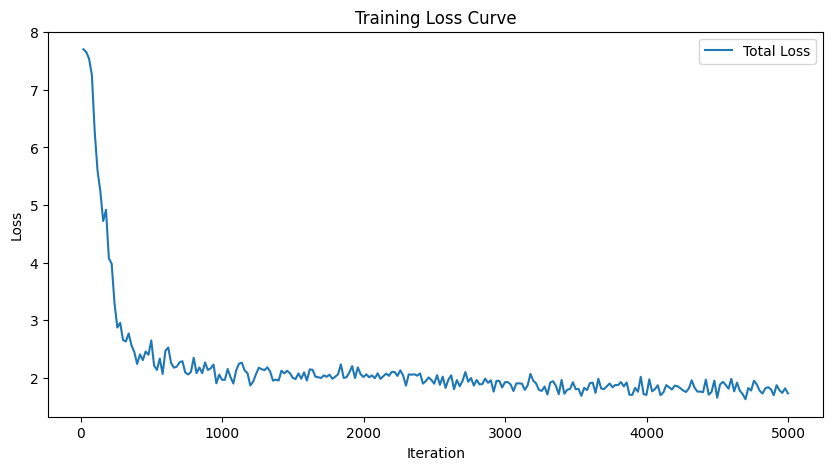

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json

# ... (rest of your imports and dataset registration)

# --------------------- Load existing events file ---------------------

# Specify the path to the events file
events_file = "/content/output_mask_rcnn/metrics.json"  # Replace with the actual path

# Load the event storage from the file
# Instead of json.load(), iterate through lines and decode each JSON object individually
data = []
with open(events_file, 'r') as f:
    for line in f:
        if line.strip():  # Skip empty lines
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Warning: Skipping invalid JSON line: {line.strip()}. Error: {e}")

# --------------------- Plot the training curves ---------------------

# The structure of the JSON data might differ based on how it was saved
# Adjust the following lines based on the content of your 'metrics.json' file
# You can refer to the format of the printed output from your original code
# to locate the desired data within the JSON file.

# Accessing total_loss data (adjust if needed)
total_loss_data = [(item['iteration'], item['total_loss']) for item in data if 'total_loss' in item]
total_loss = np.array(total_loss_data)

# Accessing bbox/AP data (adjust if needed)
# ap_data = [(item['iteration'], item['bbox/AP']) for item in data if 'bbox/AP' in item]
# ap = np.array(ap_data)

# ... (and similarly for other metrics)

plt.figure(figsize=(10, 5))
plt.plot(total_loss[:, 0], total_loss[:, 1], label="Total Loss")
# plt.plot(ap[:, 0], ap[:, 1], label="AP") # Uncomment and adjust if needed
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

# ... (rest of your inference and evaluation code - optional)

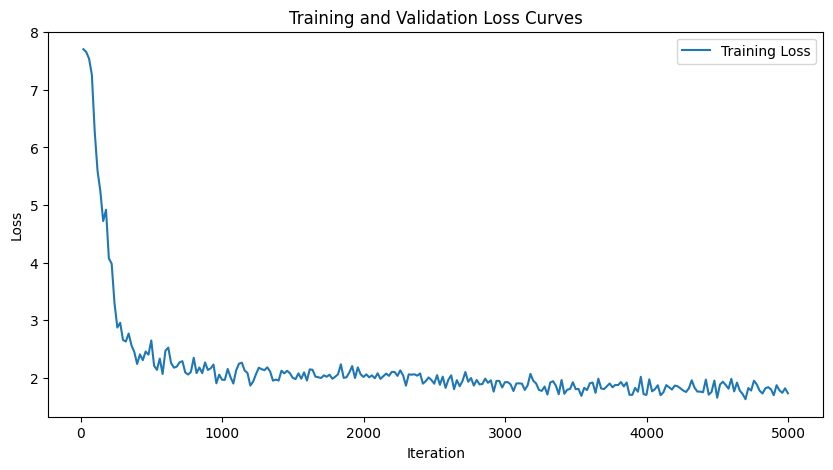

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json

# ... (rest of your imports and dataset registration)

# --------------------- Load existing events file ---------------------

# Specify the path to the events file
events_file = "/content/output_mask_rcnn/metrics.json"  # Replace with the actual path

# Load the event storage from the file
# Instead of json.load(), iterate through lines and decode each JSON object individually
data = []
with open(events_file, 'r') as f:
    for line in f:
        if line.strip():  # Skip empty lines
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Warning: Skipping invalid JSON line: {line.strip()}. Error: {e}")

# --------------------- Plot the training curves ---------------------

metrics = {}
for item in data:
    iteration = item.get('iteration', None)
    if iteration is not None:
        for key, value in item.items():
            if key != 'iteration':
                metrics.setdefault(key, []).append((iteration, value))


# Accessing total_loss data (adjust if needed)
total_loss_data = metrics.get('total_loss', [])
total_loss = np.array(total_loss_data) if total_loss_data else np.empty((0, 2))

# Accessing bbox/AP data (adjust if needed)
# ap_data = [(item['iteration'], item['bbox/AP']) for item in data if 'bbox/AP' in item]
# ap = np.array(ap_data)

# Assume 'bbox/AP' represents validation performance (adjust if necessary)
validation_loss_data = metrics.get('bbox/AP', [])
validation_loss = np.array(validation_loss_data) if validation_loss_data else np.empty((0, 2))


plt.figure(figsize=(10, 5))
plt.plot(total_loss[:, 0], total_loss[:, 1], label="Training Loss")
if validation_loss.size > 0:  # Check if validation_loss has data
    plt.plot(validation_loss[:, 0], validation_loss[:, 1], label="Validation Loss")  # Uncomment and adjust if needed
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()  # Add legend to differentiate the lines
plt.show()

# ... (rest of your inference and evaluation code - optional)

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json
import shutil  # Import shutil for zipping

# ... (rest of your imports and dataset registration)

# --------------------- Load existing events file ---------------------
# ... (code for loading and plotting training curves remains the same)

# --------------------- Zip the output directory ---------------------

output_dir = "/content/output_mask_rcnn"
zip_file_name = "output_mask_rcnn.zip"

shutil.make_archive(zip_file_name[:-4], 'zip', output_dir)  # Create the zip file

# --------------------- Provide download link ---------------------

from google.colab import files
files.download(zip_file_name)  # Provide download link for the zip file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MASK_RCNN

In [ ]:
import detectron2
print(detectron2.__version__)  # Should print 0.6 or higher
print(dir(detectron2.data.transforms))  # Check if AlbumentationsWrapper is listed

0.6


AttributeError: module 'detectron2' has no attribute 'data'

In [ ]:
!pip install -U albumentations
!pip install pycocotools

*****111111111******

In [ ]:
import os
import albumentations as A
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_train_loader, DatasetMapper, build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode, Instances, Boxes, BitMasks # Import BitMasks
import numpy as np
from PIL import Image
from pycocotools import mask as coco_mask

# Define Albumentations augmentations
albumentations_aug = A.Compose([
    A.LongestMaxSize(max_size=1024),
    A.PadIfNeeded(min_height=768, min_width=1024),
    A.RandomCrop(width=720, height=720, p=0.5),
    A.Rotate(limit=10, p=0.5, border_mode=0), # Reduce rotation limit
    A.HorizontalFlip(p=0.4),
    A.VerticalFlip(p=0.3),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
    A.OneOf([A.Blur(blur_limit=3, p=0.5), A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)], p=0.5),
], bbox_params=A.BboxParams(format='coco', label_fields=["category_ids"]))


class AlbumentationsMapper:
    def __init__(self, cfg, is_train=True):
        self.cfg = cfg
        self.is_train = is_train
        self.aug = albumentations_aug

    def __call__(self, dataset_dict):
        # Read and preprocess image
        image = Image.open(dataset_dict["file_name"]).convert("RGB")
        image = np.array(image)

        # Extract annotations
        annos = dataset_dict["annotations"]
        bboxes = [obj["bbox"] for obj in annos]
        category_ids = [obj["category_id"] for obj in annos]

        # Extract segmentation masks (RLE format) or handle missing 'segmentation'
        # If 'segmentation' key is present, use it. Otherwise, assume no masks.
        masks = []
        for obj in annos:
            if "segmentation" in obj:
                rle = obj["segmentation"]
                masks.append(coco_mask.decode(rle))
            else:
                # Handle missing segmentation (e.g., create an empty mask)
                # or skip the instance if masks are required for your task
                # For example, for detection-only tasks, you can skip adding masks
                # or create a dummy mask:
                masks.append(np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8))
                # print("Warning: 'segmentation' key not found in annotation. Assuming no mask for this instance.")

        # Apply augmentations
        transformed = self.aug(image=image, bboxes=bboxes, category_ids=category_ids, masks=masks)

        # Convert to tensor and CHW format
        image = transformed["image"]
        image = torch.from_numpy(image.transpose(2, 0, 1)).float()  # HWC -> CHW, float32

        # Update dataset_dict
        dataset_dict["image"] = image

        # Include instances in dataset_dict (important for RPN during training)
        # Create Instances object and assign attributes
        instances = Instances(image.shape[1:])  # Create Instances object with image size
        instances.gt_boxes = Boxes(np.array(transformed["bboxes"]))  # Assign boxes to instances
        instances.gt_classes = torch.tensor(transformed["category_ids"], dtype=torch.long)  # Assign classes to instances with torch.long dtype
        # Create BitMasks object for segmentation masks and assign to instances
        instances.gt_masks = BitMasks(torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in transformed['masks']]))

        dataset_dict["instances"] = instances  # Assign instances object to dataset_dict

        return dataset_dict

class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        mapper = AlbumentationsMapper(cfg, is_train=True)
        return build_detection_train_loader(cfg, mapper=mapper)

# Configuration setup
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("tiny_train_data",)
cfg.DATASETS.TEST = ("tiny_test_data",)
cfg.OUTPUT_DIR = "./output_mask_rcnn" #change output directory name
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Training parameters
cfg.MODEL.DEVICE = "cuda"  # Use "cuda" for GPU
cfg.DATALOADER.NUM_WORKERS = 4
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0001  # Reduced learning rate further
cfg.SOLVER.MAX_ITER = 10000
cfg.SOLVER.CLIP_GRADIENTS.ENABLED = True  # Enable gradient clipping
cfg.SOLVER.CLIP_GRADIENTS.CLIP_VALUE = 1.0  # Set clip value
cfg.SOLVER.CLIP_GRADIENTS.NORM_TYPE = 2.0 # Use L2 norm for clipping


# Register datasets
def remove_datasets_if_exist(dataset_names):
    for name in dataset_names:
        if name in DatasetCatalog.list():
            DatasetCatalog.remove(name)
        if name in MetadataCatalog.list():
            MetadataCatalog.remove(name)
remove_datasets_if_exist(["tiny_train_data", "tiny_test_data"])
# Register your datasets (update paths as needed)
register_coco_instances("tiny_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
# register_coco_instances("tiny_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")
register_coco_instances("tiny_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images/")
# Train
trainer = CustomTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# ---- EVALUATION ----
evaluator = COCOEvaluator("tiny_test_data", output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "tiny_test_data")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

<ipython-input-1-aaae351c354c>:25: UserWarning: Argument 'var_limit' is not valid and will be ignored.
  A.OneOf([A.Blur(blur_limit=3, p=0.5), A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)], p=0.5),


[01/31 16:12:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[01/31 16:12:06 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[01/31 16:12:07 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 54


backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[01/31 16:12:07 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ERROR [01/31 16:12:17 d2.engine.train_loop]: Exception in writing metrics: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 370, in _write_metrics
    SimpleTrainer.write_metrics(loss_dict, data_time, iter, prefix)
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 412, in write_metrics
    raise FloatingPointError(
FloatingPointError: Loss became infinite or NaN at iteration=7!
loss_dict = {'loss_cls': 4.2569499015808105, 'loss_box_reg': 8.805390098132193e-05, 'loss_mask': 0.6940460205078125, 'loss_rpn_cls': 0.5261033773422241, 'loss_rpn_loc': nan}
ERROR [01/31 16:12:17 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/defaults.py", line 530, in run_step
    

FloatingPointError: Loss became infinite or NaN at iteration=7!
loss_dict = {'loss_cls': 4.2569499015808105, 'loss_box_reg': 8.805390098132193e-05, 'loss_mask': 0.6940460205078125, 'loss_rpn_cls': 0.5261033773422241, 'loss_rpn_loc': nan}

In [ ]:
import os
import torch
import random
import detectron2.data.transforms as T
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_train_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data.datasets import register_coco_instances
from collections import Counter
import cv2
from detectron2.structures import BoxMode, Boxes
import numpy as np
# Import necessary modules from albumentations
import albumentations as A
# from albumentations.augmentations.transforms import RandomBrightnessContrast, HorizontalFlip, Rotate
from albumentations.pytorch import ToTensorV2  # Import ToTensorV2
import logging  # Import logging for error handling

def remove_datasets_if_exist(dataset_names):
    """Removes datasets from DatasetCatalog and MetadataCatalog if they exist.

    Args:
        dataset_names (list): A list of dataset names to remove.
    """
    for dataset_name in dataset_names:
        if dataset_name in DatasetCatalog.list():
            DatasetCatalog.remove(dataset_name)
        if dataset_name in MetadataCatalog.list():
            MetadataCatalog.remove(dataset_name)

# List of dataset names to remove
dataset_names_to_remove = ["tiny_train_data", "tiny_test_data", "tiny_balanced_train_data"]

# Remove datasets if they exist
remove_datasets_if_exist(dataset_names_to_remove)
# Check device availability
device = "cuda" if torch.cuda.is_available() else "cpu"

# Register datasets
register_coco_instances("tiny_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json",
                        "/content/split-dataset/train/images")
register_coco_instances("tiny_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json",
                        "/content/split-dataset/test/images")

# Get dataset info
train_data = DatasetCatalog.get("tiny_train_data")
metadata = MetadataCatalog.get("tiny_train_data")
num_classes = len(metadata.thing_classes)  # Number of object classes

# ---- CLASS BALANCING: Oversampling minority classes ----
def balance_dataset(dataset_dicts):
    class_counts = Counter([d['annotations'][0]['category_id'] for d in dataset_dicts])
    max_samples = max(class_counts.values())

    balanced_data = []
    for class_id, count in class_counts.items():
        class_images = [d for d in dataset_dicts if d['annotations'][0]['category_id'] == class_id]
        multiplier = max_samples // count  # Repeat minority class images
        balanced_data.extend(class_images * multiplier)
        balanced_data.extend(random.sample(class_images, max_samples % count))  # Add remainder

    return balanced_data

balanced_train_data = balance_dataset(train_data)
DatasetCatalog.register("tiny_balanced_train_data", lambda: balanced_train_data)
cfg_dataset_train = "tiny_balanced_train_data"

# ---- CUSTOM AUGMENTATION ----
def get_augmentations(train=True):
    if train:
        transform = A.Compose([
            A.LongestMaxSize(max_size=1920),
            A.PadIfNeeded(min_height=1080, min_width=1920),
            A.RandomCrop(width=1280, height=720, p=0.5),
            A.Rotate(limit=20, p=0.7, border_mode=0),
            A.HorizontalFlip(p=0.4),
            A.VerticalFlip(p=0.3),
            A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
            A.OneOf([
                A.Blur(blur_limit=3, p=0.5),
                A.GaussNoise(var_limit=(10, 50), p=0.5),
            ], p=0.5),
        ], bbox_params=A.BboxParams(format='coco', min_area=1024,  # Reduced min_area
                                     min_visibility=0.1, label_fields=["category_ids"]))  # Reduced min_visibility
    else:
        transform = A.Compose([])  # Empty list for no augmentations during inference
    return transform

class CustomMapper:
    def __init__(self):
        self.augmentations = get_augmentations()  # Initialize augmentations
        self.to_tensor = ToTensorV2()  # Initialize ToTensorV2 separately

    def __call__(self, dataset_dict):
        dataset_dict = dataset_dict.copy()  # make a copy of the dict
        image = cv2.imread(dataset_dict["file_name"])
        if image is None:
            raise ValueError(f"Failed to load image at {dataset_dict['file_name']}")
        h, w, _ = image.shape

        # Convert COCO format to Albumentations format (relative coordinates)
        bboxes_albumentations = [
            [ann['bbox'][0] / w, ann['bbox'][1] / h,
             (ann['bbox'][0] + ann['bbox'][2]) / w,
             (ann['bbox'][1] + ann['bbox'][3]) / h]
            for ann in dataset_dict['annotations']
        ]

        transformed = self.augmentations(
            image=image, bboxes=bboxes_albumentations,
            category_ids=[ann['category_id'] for ann in dataset_dict['annotations']]
        )
        image = transformed['image']  # Get augmented image from transformed dict

        # Convert image to tensor using ToTensorV2 and unpack the result
        image_tensor_dict = self.to_tensor(image=image)
        # unpack and assign directly to dataset_dict["image"]
        dataset_dict["image"] = image_tensor_dict["image"]

        bboxes_transformed_albumentations = transformed['bboxes']

        # Convert back to COCO format (absolute coordinates)
        bboxes_transformed_coco = [
            [int(bbox[0] * w), int(bbox[1] * h),
             int((bbox[2] - bbox[0]) * w),
             int((bbox[3] - bbox[1]) * h)]
            for bbox in bboxes_transformed_albumentations
        ]

        # Update dataset_dict with augmented image and bounding boxes
        # If no bounding boxes are left after augmentation, handle it
        if not bboxes_transformed_coco:
            print(
                f"Skipping image {dataset_dict['file_name']} - No bounding boxes after augmentation"
            )
            # Instead of returning None, return the original image and an empty list of annotations
            dataset_dict["image"] = self.to_tensor(image=image)['image']  # Apply ToTensorV2
            dataset_dict["annotations"] = []  # Empty annotations
            return dataset_dict  # Return the modified dataset_dict


        annos = []
        for i, bbox in enumerate(bboxes_transformed_coco):  # Loop over transformed bboxes
            if i < len(dataset_dict.pop("annotations")):  # Only update if there's a corresponding annotation
                obj = dataset_dict["annotations"][i]
                if obj.get("iscrowd", 0) == 0:
                    obj['bbox'] = bbox
                    obj["bbox_mode"] = BoxMode.XYWH_ABS
                    annos.append(obj)
        dataset_dict["annotations"] = annos
        return dataset_dict

# ... (rest of the code remains the same)

# ---- CONFIGURATION ----
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = (cfg_dataset_train,)
cfg.DATASETS.TEST = ("tiny_test_data",)
cfg.OUTPUT_DIR = "/content/output_faster_rcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Set number of classes

# ---- SMALL OBJECT DETECTION ----
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64]]  # Adjust anchor sizes
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0]]
cfg.MODEL.RPN.PRE_NMS_TOPK_TRAIN = 2000
cfg.MODEL.RPN.POST_NMS_TOPK_TRAIN = 1000
cfg.MODEL.RPN.PRE_NMS_TOPK_TEST = 1000
cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 500

# ---- HYPERPARAMETER TUNING ----
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.0001  # Lower LR to prevent overfitting
cfg.SOLVER.MAX_ITER = 8000  # Increase training iterations
cfg.SOLVER.STEPS = (2000, 5000)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05  # Set inference threshold
cfg.MODEL.DEVICE = device

# ---- LOAD PRETRAINED MODEL ----
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# ---- CUSTOM TRAINER ----
class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(cfg, mapper=CustomMapper())

# Define a custom function to handle missing indices
def custom_map_dataset_getitem(self, idx):
    # Access the internal dataset using _dataset
    if idx not in self._fallback_candidates:
        try:
            retval = self._dataset[idx]  # Use _dataset instead of dataset
        except Exception as e:
            logger = logging.getLogger(__name__)
            logger.warning(
                f"Failed to fetch entry {idx} from dataset {self._dataset}."  # Use _dataset
                f" Error: {str(e)}"
            )
            if isinstance(e, (KeyError, IndexError)):
                # allow it to be missing, but not any other errors
                self._fallback_candidates.add(idx)
            else:
                raise
        else:
            return retval

    # If we reach here, the index was missing, so we need to find a fallback
    # Replace the random.sample call to handle sets correctly
    fallback_idx = random.choice(list(self._fallback_candidates))  # Convert set to list
    return self._dataset[fallback_idx]  # Use _dataset instead of dataset

# Monkey patch the __getitem__ method of MapDataset
from detectron2.data.common import MapDataset
MapDataset.__getitem__ = custom_map_dataset_getitem

trainer = CustomTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# ---- EVALUATION ----
evaluator = COCOEvaluator("tiny_test_data", output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "tiny_test_data")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[01/29 17:54:15 d2.data.datasets.coco]: Loaded 10836 images in COCO format from /content/split-dataset/coco_annotations/train_coco.json
[01/29 17:54:16 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7)

<ipython-input-6-44fa3d25a581>:84: UserWarning: Argument 'var_limit' is not valid and will be ignored.
  A.GaussNoise(var_limit=(10, 50), p=0.5),


[01/29 17:54:16 d2.data.common]: Serialized dataset takes 14.03 MiB
[01/29 17:54:16 d2.data.build]: Making batched data loader with batch_size=4
[01/29 17:54:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model_final_280758.pkl: 167MB [00:05, 30.2MB/s]                           
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/29 17:54:22 d2.engine.train_loop]: Starting training from iteration 0
ERROR [01/29 17:54:22 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/defaults.py", line 530, in run_step
    self._trainer.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 310, in run_step
    loss_dict = self.model(data)
                ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lo

KeyError: 'image'

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle # Import the pickle module to enable saving evaluation results

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# --- Dataset Registration ---
register_coco_instances("my_train_data", {},
                       "/content/split-dataset/coco_annotations/train_coco.json",
                       "/content/split-dataset/train/images")

register_coco_instances("my_test_data", {},
                       "/content/split-dataset/coco_annotations/test_coco.json",
                       "/content/split-dataset/test/images/")

# --- Configuration Setup ---
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Dataset configuration
cfg.DATASETS.TRAIN = ("my_train_data",)
cfg.DATASETS.TEST = ("my_test_data",)

# Model configuration (DO NOT CHANGE num_classes - use whatever your dataset has)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Keep your existing number of classes
cfg.MODEL.DEVICE = device

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 4000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05

# Output configuration
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# --- Training ---
# Initialize with pretrained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Start training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# --- Save Final Model ---
# Save the final model weights
torch.save(trainer.model.state_dict(), os.path.join(cfg.OUTPUT_DIR, "final_model.pth"))

# Save configuration
with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), "w") as f:
    f.write(cfg.dump())

# --- Evaluation ---
# Load the best performing model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

# Run evaluation
evaluator = COCOEvaluator("my_test_data", output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "my_test_data")
results = inference_on_dataset(predictor.model, val_loader, evaluator)

# Save evaluation results
with open(os.path.join(cfg.OUTPUT_DIR, "evaluation_results.pkl"), "wb") as f:
    pickle.dump(results, f)

print("Evaluation Results:", results)
print(f"All outputs saved to: {cfg.OUTPUT_DIR}")




[01/31 15:20:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model_final_280758.pkl: 167MB [00:01, 165MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/31 15:20:45 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/31 15:21:08 d2.utils.events]:  eta: 1:04:09  iter: 19  total_loss: 1.901  loss_cls: 1.748  loss_box_reg: 0.1366  loss_rpn_cls: 0.005057  loss_rpn_loc: 0.009553    time: 0.9533  last_time: 0.8775  data_time: 0.0589  last_data_time: 0.0064   lr: 1.9981e-05  max_mem: 5045M
[01/31 15:21:33 d2.utils.events]:  eta: 1:04:23  iter: 39  total_loss: 1.294  loss_cls: 1.142  loss_box_reg: 0.1367  loss_rpn_cls: 0.003373  loss_rpn_loc: 0.01148    time: 0.9665  last_time: 1.0635  data_time: 0.0337  last_data_time: 0.0493   lr: 3.9961e-05  max_mem: 5045M
[01/31 15:21:53 d2.utils.events]:  eta: 1:05:26  iter: 59  total_loss: 0.5216  loss_cls: 0.3388  loss_box_reg: 0.1471  loss_rpn_cls: 0.00312  loss_rpn_loc: 0.009185    time: 0.9868  last_time: 1.1616  data_time: 0.0312  last_data_time: 0.0683   lr: 5.9941e-05  max_mem: 5045M
[01/31 15:22:15 d2.utils.events]:  eta: 1:07:08  iter: 79  total_loss: 0.3444  loss_cls: 0.1862  loss_box_reg: 0.1338  loss_rpn_cls: 0.003997  loss_rpn_loc: 0.009532    time: 

KeyboardInterrupt: 

In [ ]:
import os
import torch
import pickle
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.logger import setup_logger
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle
# Initialize logger
setup_logger()

# Configuration
class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        return COCOEvaluator(dataset_name, output_dir=cfg.OUTPUT_DIR)

def main():
    # Device configuration
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    # Dataset registration
    register_coco_instances("my_train", {},
                           "/content/split-dataset/coco_annotations/train_coco.json",
                           "/content/split-dataset/train/images")

    register_coco_instances("my_test", {},
                           "/content/split-dataset/coco_annotations/test_coco.json",
                           "/content/split-dataset/test/images")

    # Configuration setup
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

    # Dataset configuration
    cfg.DATASETS.TRAIN = ("my_train",)
    cfg.DATASETS.TEST = ("my_test",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS = False

    # Model configuration
    cfg.MODEL.DEVICE = device
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Keep your original class count
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

    # Augmentation configuration
    cfg.INPUT.MIN_SIZE_TRAIN = (640, 800, 1024)
    cfg.INPUT.MAX_SIZE_TRAIN = 1333
    cfg.INPUT.CROP.ENABLED = True
    cfg.INPUT.RANDOM_FLIP = "horizontal"

    # Solver configuration
    cfg.SOLVER.IMS_PER_BATCH = 4
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 10000
    cfg.SOLVER.STEPS = (5000, 7500)
    cfg.SOLVER.GAMMA = 0.1
    cfg.SOLVER.CHECKPOINT_PERIOD = 1000

    # Output configuration
    cfg.OUTPUT_DIR = "/content/output"
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

    # Training
    trainer = CustomTrainer(cfg)
    trainer.resume_or_load(resume=False)
    print("Starting training...")
    trainer.train()

    # Save final model
    torch.save(trainer.model.state_dict(), os.path.join(cfg.OUTPUT_DIR, "final_model.pth"))

    # Save configuration
    with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), "w") as f:
        f.write(cfg.dump())

    # Evaluation
    print("\nStarting evaluation...")
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
    predictor = DefaultPredictor(cfg)

    evaluator = COCOEvaluator("my_test", output_dir=cfg.OUTPUT_DIR)
    val_loader = build_detection_test_loader(cfg, "my_test")
    results = inference_on_dataset(predictor.model, val_loader, evaluator)

    # Save evaluation results
    with open(os.path.join(cfg.OUTPUT_DIR, "evaluation.pkl"), "wb") as f:
        pickle.dump(results, f)

    # Save metrics visualization
    plt.figure(figsize=(12, 8))
    plt.plot(results['bbox']['AP'], label='mAP')
    plt.plot(results['bbox']['AP50'], label='AP50')
    plt.plot(results['bbox']['AP75'], label='AP75')
    plt.title("Performance Metrics")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.legend()
    plt.savefig(os.path.join(cfg.OUTPUT_DIR, "metrics.png"))

    print("\nTraining and evaluation completed!")
    print(f"Final mAP: {results['bbox']['AP']:.3f}")
    print(f"Output saved to: {cfg.OUTPUT_DIR}")

if __name__ == "__main__":
    main()



Using device: cuda
[01/30 20:49:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


Starting training...
[01/30 20:49:49 d2.engine.train_loop]: Starting training from iteration 0
[01/30 20:50:28 d2.utils.events]:  eta: 5:17:46  iter: 19  total_loss: 2.072  loss_cls: 1.911  loss_box_reg: 0.1185  loss_rpn_cls: 0.002428  loss_rpn_loc: 0.0258    time: 1.9208  last_time: 1.7452  data_time: 0.0921  last_data_time: 0.0853   lr: 4.9953e-06  max_mem: 12090M
[01/30 20:51:04 d2.utils.events]:  eta: 5:08:16  iter: 39  total_loss: 1.893  loss_cls: 1.745  loss_box_reg: 0.1239  loss_rpn_cls: 0.003719  loss_rpn_loc: 0.01731    time: 1.8722  last_time: 1.7752  data_time: 0.0366  last_data_time: 0.0254   lr: 9.9902e-06  max_mem: 12091M
[01/30 20:51:42 d2.utils.events]:  eta: 5:12:39  iter: 59  total_loss: 1.501  loss_cls: 1.36  loss_box_reg: 0.1065  loss_rpn_cls: 0.003891  loss_rpn_loc: 0.03701    time: 1.8659  last_time: 1.9707  data_time: 0.0391  last_data_time: 0.0427   lr: 1.4985e-05  max_mem: 12092M
[01/30 20:52:19 d2.utils.events]:  eta: 5:16:15  iter: 79  total_loss: 1.041  loss

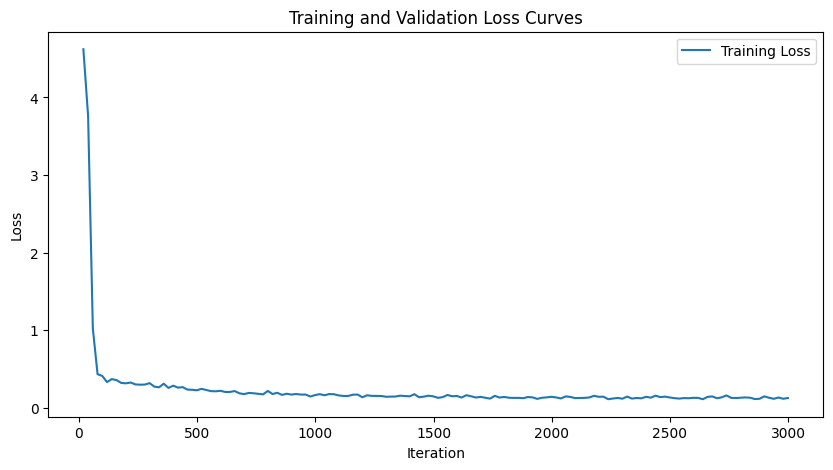

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json

# ... (rest of your imports and dataset registration)

# --------------------- Load existing events file ---------------------

# Specify the path to the events file
events_file = "/content/output/metrics.json"  # Replace with the actual path

# Load the event storage from the file
# Instead of json.load(), iterate through lines and decode each JSON object individually
data = []
with open(events_file, 'r') as f:
    for line in f:
        if line.strip():  # Skip empty lines
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Warning: Skipping invalid JSON line: {line.strip()}. Error: {e}")

# --------------------- Plot the training curves ---------------------

metrics = {}
for item in data:
    iteration = item.get('iteration', None)
    if iteration is not None:
        for key, value in item.items():
            if key != 'iteration':
                metrics.setdefault(key, []).append((iteration, value))


# Accessing total_loss data (adjust if needed)
total_loss_data = metrics.get('total_loss', [])
total_loss = np.array(total_loss_data) if total_loss_data else np.empty((0, 2))

# Accessing bbox/AP data (adjust if needed)
# ap_data = [(item['iteration'], item['bbox/AP']) for item in data if 'bbox/AP' in item]
# ap = np.array(ap_data)

# Assume 'bbox/AP' represents validation performance (adjust if necessary)
validation_loss_data = metrics.get('bbox/AP', [])
validation_loss = np.array(validation_loss_data) if validation_loss_data else np.empty((0, 2))


plt.figure(figsize=(10, 5))
plt.plot(total_loss[:, 0], total_loss[:, 1], label="Training Loss")
if validation_loss.size > 0:  # Check if validation_loss has data
    plt.plot(validation_loss[:, 0], validation_loss[:, 1], label="Validation Loss")  # Uncomment and adjust if needed
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()  # Add legend to differentiate the lines
plt.show()

# ... (rest of your inference and evaluation code - optional)

In [ ]:
import os
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor, HookBase
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.events import get_event_storage, EventStorage
from detectron2.utils.events import CommonMetricPrinter, JSONWriter, TensorboardXWriter
import matplotlib.pyplot as plt
import numpy as np
import json
import shutil  # Import shutil for zipping

# ... (rest of your imports and dataset registration)

# --------------------- Load existing events file ---------------------
# ... (code for loading and plotting training curves remains the same)

# --------------------- Zip the output directory ---------------------

output_dir = "/content/output"
zip_file_name = "output.zip"

shutil.make_archive(zip_file_name[:-4], 'zip', output_dir)  # Create the zip file

# --------------------- Provide download link ---------------------

from google.colab import files
files.download(zip_file_name)  # Provide download link for the zip file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import torch
import pickle
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator

# Define device (CUDA or CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"



# Register datasets (Make sure to replace the paths according to your dataset structure)
register_coco_instances("my_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
# register_coco_instances("my_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")
register_coco_instances("my_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images/")

# Setup configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Dataset paths
cfg.DATASETS.TRAIN = ("my_train_data",)
cfg.DATASETS.TEST = ("my_test_data",)

# Set number of classes (adjust according to your dataset)
# num_classes = 98  # Replace with the correct number of classes
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes

# Set batch size and learning rate
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 3000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for inference

# Set device (CUDA or CPU)
cfg.MODEL.DEVICE = device

# Output directory for checkpoints and logs
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)  # Ensure output directory exists

# Enable automatic resuming of training
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Use Detectron2's DefaultTrainer for training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Start training
trainer.train()

# Evaluation
evaluator = COCOEvaluator("tiny_test_data", output_dir=cfg.OUTPUT_DIR)  # Use "val" here
val_loader = build_detection_test_loader(cfg, "tiny_test_data")  # Use "val" here
print(inference_on_dataset(trainer.model, val_loader, evaluator))


[01/30 15:35:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:00, 171MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/30 15:35:52 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/30 15:36:14 d2.utils.events]:  eta: 0:44:08  iter: 19  total_loss: 2.271  loss_cls: 2.137  loss_box_reg: 0.122  loss_rpn_cls: 0.002592  loss_rpn_loc: 0.01032    time: 0.8986  last_time: 0.8837  data_time: 0.0638  last_data_time: 0.0579   lr: 1.9981e-05  max_mem: 4867M
[01/30 15:36:41 d2.utils.events]:  eta: 0:45:47  iter: 39  total_loss: 1.573  loss_cls: 1.443  loss_box_reg: 0.1127  loss_rpn_cls: 0.00324  loss_rpn_loc: 0.008847    time: 0.9216  last_time: 0.9793  data_time: 0.0331  last_data_time: 0.0259   lr: 3.9961e-05  max_mem: 4869M
[01/30 15:37:00 d2.utils.events]:  eta: 0:45:28  iter: 59  total_loss: 0.543  loss_cls: 0.4175  loss_box_reg: 0.1047  loss_rpn_cls: 0.001882  loss_rpn_loc: 0.01144    time: 0.9294  last_time: 0.8453  data_time: 0.0312  last_data_time: 0.0085   lr: 5.9941e-05  max_mem: 4869M
[01/30 15:37:19 d2.utils.events]:  eta: 0:45:09  iter: 79  total_loss: 0.3083  loss_cls: 0.18  loss_box_reg: 0.1242  loss_rpn_cls: 0.002297  loss_rpn_loc: 0.009224    time: 0.933

NameError: name 'COCOEvaluator' is not defined

In [ ]:
! ls /content/output

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
import cv2
import matplotlib.pyplot as plt

# Load the trained model
cfg = get_cfg()
cfg.merge_from_file("/content/output/config.yaml")  # Ensure this file exists
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Adjust confidence threshold as needed
cfg.MODEL.DEVICE = "cuda"  # Use GPU if available

# Initialize predictor
predictor = DefaultPredictor(cfg)


In [ ]:
! ls /content/output/


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

**********************************************************here************************************s

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog  # Import DatasetCatalog
from detectron2.data.dataset_mapper import DatasetMapper # Import DatasetMapper instead of Dataset

from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.structures import BoxMode
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog  # Import DatasetCatalog
from detectron2.data.dataset_mapper import DatasetMapper # Import DatasetMapper instead of Dataset
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import os
import json
from detectron2.engine import DefaultPredictor # Import DefaultPredictor
from google.colab.patches import cv2_imshow  # Import cv2_imshow from patches


# Define device (CUDA or CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

def get_ip102_dicts(img_dir, json_path):
    """
    Load IP102 dataset annotations into Detectron2 format.
    Args:
        img_dir (str): Path to the directory containing images.
        json_path (str): Path to the COCO annotation JSON file.
    Returns:
        list[dict]: List of dictionaries in Detectron2 format.
    """
    with open(json_path, 'r') as f:
        coco_data = json.load(f)

    dataset_dicts = []
    for image_data in coco_data['images']:
        record = {}
        record["file_name"] = os.path.join(img_dir, image_data["file_name"])
        record["image_id"] = image_data["id"]
        record["height"] = image_data["height"]
        record["width"] = image_data["width"]

        annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_data['id']]
        objs = []
        for ann in annotations:
            bbox = ann['bbox']
            xmin, ymin, width, height = bbox
            xmax = xmin + width
            ymax = ymin + height

            obj = {
                "bbox": [xmin, ymin, xmax, ymax],
                "bbox_mode": BoxMode.XYXY_ABS,
                "category_id": ann['category_id'] - 1,  # Adjust category ID if needed
                "iscrowd": ann.get("iscrowd", 0)
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog

def remove_datasets_if_exist(dataset_names):
    """Removes datasets from DatasetCatalog and MetadataCatalog if they exist.

    Args:
        dataset_names (list): A list of dataset names to remove.
    """
    for dataset_name in dataset_names:
        if dataset_name in DatasetCatalog.list():
            DatasetCatalog.remove(dataset_name)
        if dataset_name in MetadataCatalog.list():
            MetadataCatalog.remove(dataset_name)

# List of dataset names to remove
dataset_names_to_remove = ["train_dataset", "val", "my_test_data"]

# Remove datasets if they exist
remove_datasets_if_exist(dataset_names_to_remove)
# Register the dataset (replace with your actual dataset path)
# DatasetCatalog.register("train_dataset", lambda: train_dataset)
# MetadataCatalog.get("train_dataset").set(thing_classes=class_names)  # List your class names

# Register the datasets
DatasetCatalog.register("train_dataset", lambda: get_ip102_dicts("/content/split-dataset/train/images",
                                                                  "/content/split-dataset/coco_annotations/train_coco.json"))
MetadataCatalog.get("train_dataset").set(thing_classes=class_names)

DatasetCatalog.register("val", lambda: get_ip102_dicts("/content/split-dataset/test/images",
                                                        "/content/split-dataset/coco_annotations/test_coco.json"))
MetadataCatalog.get("val").set(thing_classes=class_names)


# Set up configuration
cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/mask_rcnn_R_50_FPN_3x.yaml"))
# Changed from COCO-Detection to COCO-InstanceSegmentation
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")) # **Use object detection config**


cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Total number of classes in the subset
  # Set number of classes

# Use pre-trained weights or initialize from scratch
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/mask_rcnn_R_50_FPN_3x.yaml")
# Changed from COCO-Detection to COCO-InstanceSegmentation
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000  # Update based on your dataset size

# Trainer setup and training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# Evaluation
evaluator = COCOEvaluator("val", output_dir=cfg.OUTPUT_DIR)  # Use "val" here
val_loader = build_detection_test_loader(cfg, "val")  # Use "val" here
print(inference_on_dataset(trainer.model, val_loader, evaluator))

print(DatasetCatalog.get("val"))  # Replace "val" with your dataset name

from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
import cv2
import random
predictor = DefaultPredictor(cfg)

dataset_dicts = DatasetCatalog.get("val")  # Adjust name as needed
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata={}, instance_mode=ColorMode.IMAGE_BW)
    outputs = predictor(img)  # Use the trained model to predict
    v = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])  # Use cv2_imshow instead of cv2.imshow


NameError: name 'torch' is not defined

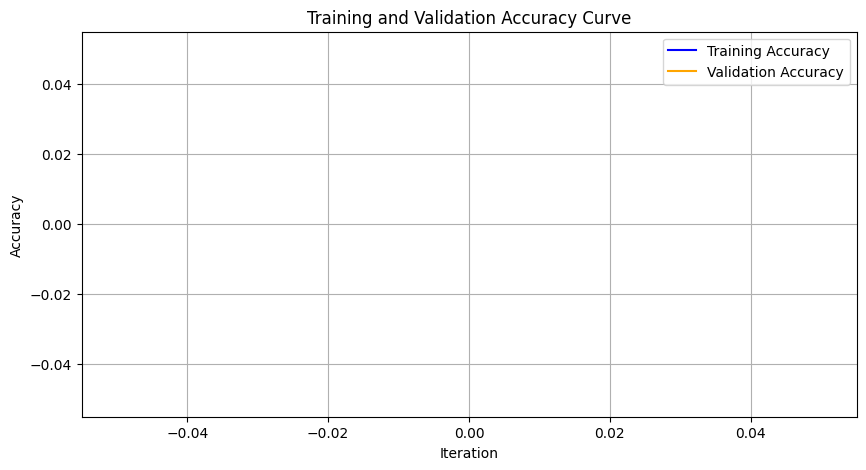

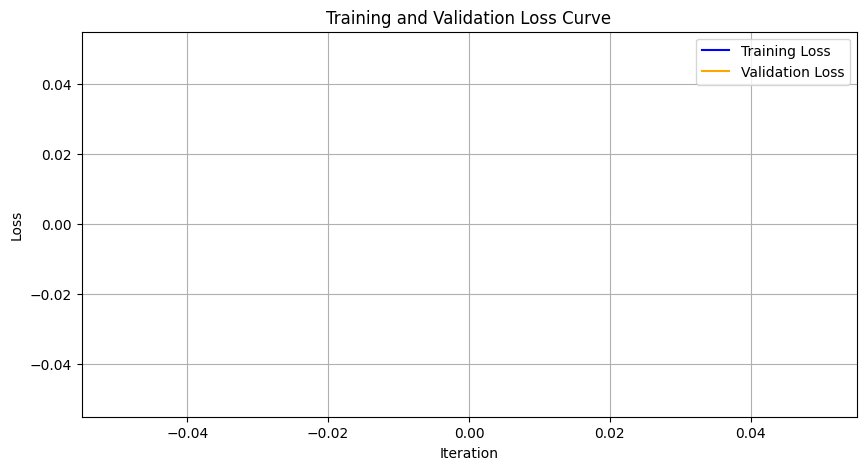

In [ ]:
import json
import matplotlib.pyplot as plt

# Path to the metrics.json file
metrics_file = "./output/metrics.json"

# Load the metrics from the JSON file
with open(metrics_file, "r") as f:
    metrics = [json.loads(line) for line in f]

# Extract training and validation loss and accuracy
train_iterations = []
train_loss = []
train_accuracy = []

val_iterations = []
val_loss = []
val_accuracy = []

# Loop through the metrics and extract relevant information
for x in metrics:
    if "iteration" in x:
        # Extract training loss and accuracy
        if "total_loss" in x and "train_accuracy" in x:
            train_iterations.append(x["iteration"])
            train_loss.append(x["total_loss"])
            train_accuracy.append(x["train_accuracy"])

        # Extract validation loss and accuracy
        if "bbox/AP" in x and "val_accuracy" in x:
            val_iterations.append(x["iteration"])
            val_loss.append(x["bbox/AP"])  # Assuming bbox/AP is used for validation loss
            val_accuracy.append(x["val_accuracy"])

# Plot Training and Validation Accuracy Curves
plt.figure(figsize=(10, 5))
plt.plot(train_iterations, train_accuracy, label="Training Accuracy", color="blue")
plt.plot(val_iterations, val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(train_iterations, train_loss, label="Training Loss", color="blue")
plt.plot(val_iterations, val_loss, label="Validation Loss", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ("val",)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.TEST.EVAL_PERIOD = 500
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 10000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 97  # Modify as per your dataset classes
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [ ]:
def register_coco_dataset(name, json_file, image_root, class_names):
    from detectron2.data.datasets import register_coco_instances
    register_coco_instances(name, {}, json_file, image_root)

    # Register the metadata with class names
    metadata = MetadataCatalog.get(name)
    metadata.set(thing_classes=class_names)

# Register the train and validation datasets
register_coco_dataset("train", train_anno_path, train_img_path, class_names)
register_coco_dataset("val", val_anno_path, val_img_path, class_names)


In [ ]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
evaluator = COCOEvaluator("val", output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))


[01/24 13:22:57 d2.evaluation.coco_evaluation]: Trying to convert 'val' to COCO format ...
[01/24 13:22:57 d2.data.datasets.coco]: Converting annotations of dataset 'val' to COCO format ...)


KeyError: "Dataset 'val' is not registered! Available datasets are: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fine_sem_seg_val, cityscapes_fine_instance_seg_test, cityscapes_fine_sem_seg_test, cityscapes_fine_panoptic_train, cityscapes_fine_panoptic_val, voc_2007_trainval, voc_2007_train, voc_2007_val, voc_2007_test, voc_2012_trainval, voc_2012_train, voc_2012_val, ade20k_sem_seg_train, ade20k_sem_seg_val, my_train_data, my_val_data, my_test_data, train_dataset"

In [ ]:
torch.save(trainer.model.state_dict(), os.path.join(cfg.OUTPUT_DIR, "mymodel.pth"))


In [ ]:
from detectron2.utils.visualizer import Visualizer
import cv2
img = cv2.imread("/path/to/sample_image.jpg")
outputs = trainer.model(img)
visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("val"), scale=0.8)
out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imshow(out.get_image()[:, :, ::-1])


********** Convert Images to Tensor *********** **

In [ ]:
# Define a target size for resizing
resize_transform = transforms.Resize((800, 800))  # Resize images to 800x800 (or any desired size)

# Verify the dataset
for images, targets in train_loader:
    # Resize and convert PIL images to tensors
    images = torch.stack([transforms.Compose([resize_transform, transforms.ToTensor()])(img) for img in images])
    print(f"Images batch shape: {images.shape}")
    print(f"Targets: {targets}")
    break  # Stop after the first batch


Images batch shape: torch.Size([4, 3, 800, 800])
Targets: ({'boxes': tensor([[  0.,   0., 750., 720.]]), 'labels': tensor([1])}, {'boxes': tensor([[ 400.,  120., 1430.,  990.]]), 'labels': tensor([1])}, {'boxes': tensor([[ 371.,  546., 1798., 1499.]]), 'labels': tensor([1])}, {'boxes': tensor([[  88.,    0., 1280.,  675.]]), 'labels': tensor([1])})



*********** Set up the Mask-RCNN model************


In [ ]:
import torch
import torchvision
from torchvision.models.detection import MaskRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Number of classes in your dataset (include background as class 0)
num_classes = 102  # Adjust this based on your subset of classes

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

# Update the box predictor for classification
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Update the mask predictor for segmentation
in_channels_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
dim_reduced = 256  # Default hidden layer dimension
model.roi_heads.mask_predictor = MaskRCNNPredictor(in_channels_mask, dim_reduced, num_classes)

# Set the model to training mode
model.train()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model summary for verification
print(model)

# Define an optimizer (adjust hyperparameters as needed)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Define a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Losses to track during training
losses_to_track = ["loss_classifier", "loss_box_reg", "loss_mask", "loss_objectness", "loss_rpn_box_reg"]

print("Model is ready for training.")


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 181MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

**  ***** Set up the training loop  **** **

** ***********  Evaluate the model ***********  **

In [ ]:
import torch
import torchvision
from torchvision.datasets import CocoDetection
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
import os

# Paths to your datasets
train_anno_path = "/content/split-dataset/coco_annotations/train_coco.json"
val_anno_path = "/content/split-dataset/coco_annotations/val_coco.json"
test_anno_path = "/content/split-dataset/coco_annotations/test_coco.json"
train_img_path = "/content/split-dataset/train/images"
val_img_path = "/content/split-dataset/val/images"
test_img_path = "/content/split-dataset/test/images"

# Define transformations (data augmentation + normalization)
def get_transforms(train=True):
    transforms = [ToTensor()]
    if train:
        transforms.extend([
            # Add augmentations like RandomHorizontalFlip, etc., if needed
        ])
    transforms.append(Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))
    return Compose(transforms)


# Datasets
train_dataset = CocoDetection(train_img_path, train_anno_path, transforms=get_transforms(train=True))
val_dataset = CocoDetection(val_img_path, val_anno_path, transforms=get_transforms(train=False))
test_dataset = CocoDetection(test_img_path, test_anno_path, transforms=get_transforms(train=False))

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

print("Datasets and dataloaders prepared.")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Datasets and dataloaders prepared.


real time Augmentition

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.13/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.13/index.html


In [ ]:
# Install dependencies for Detectron2
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1+cu117 -f https://download.pytorch.org/whl/cuda/11.7/torch_stable.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu117/torch1.13/index.html


Looking in links: https://download.pytorch.org/whl/cuda/11.7/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.13.1+cu117 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==1.13.1+cu117
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu117/torch1.13/index.html


In [ ]:
import torch

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [ ]:
import os
import torch
import pickle
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

# Define device (CUDA or CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Register datasets (Make sure to replace the paths according to your dataset structure)
register_coco_instances("my_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
register_coco_instances("my_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")
register_coco_instances("my_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images/")

# Setup configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Dataset paths
cfg.DATASETS.TRAIN = ("my_train_data",)
cfg.DATASETS.TEST = ("my_val_data",)

# Set number of classes (adjust according to your dataset)
num_classes = 98  # Replace with the correct number of classes
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes

# Set batch size and learning rate
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 3000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for inference

# Set device (CUDA or CPU)
cfg.MODEL.DEVICE = device

# Output directory for checkpoints and logs
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)  # Ensure output directory exists

# Enable automatic resuming of training
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Use Detectron2's DefaultTrainer for training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Start training
trainer.train()

# Save the model after training
torch.save(trainer.model.state_dict(), "/content/output/model.pth")

# Save the training history (Detectron2 does not provide a built-in method to track metrics, so you can manually track them)
history = {
    "train_loss": trainer.train_loss,
    "val_loss": trainer.val_loss,
    "train_accuracy": trainer.train_accuracy,
    "val_accuracy": trainer.val_accuracy
}
with open("/content/output/training_history.pkl", "wb") as f:
    pickle.dump(history, f)

# Plot training/validation loss and accuracy
with open("/content/output/training_history.pkl", "rb") as f:
    history = pickle.load(f)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


[01/24 11:14:15 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model_final_280758.pkl: 167MB [00:00, 179MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/24 11:14:16 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/24 11:14:39 d2.utils.events]:  eta: 0:46:03  iter: 19  total_loss: 4.718  loss_cls: 4.531  loss_box_reg: 0.1315  loss_rpn_cls: 0.005129  loss_rpn_loc: 0.01054    time: 0.9257  last_time: 0.9147  data_time: 0.0520  last_data_time: 0.0276   lr: 1.9981e-05  max_mem: 5049M
[01/24 11:15:02 d2.utils.events]:  eta: 0:46:41  iter: 39  total_loss: 3.748  loss_cls: 3.621  loss_box_reg: 0.1238  loss_rpn_cls: 0.003323  loss_rpn_loc: 0.01071    time: 0.9349  last_time: 0.9170  data_time: 0.0303  last_data_time: 0.0253   lr: 3.9961e-05  max_mem: 5049M
[01/24 11:15:22 d2.utils.events]:  eta: 0:47:03  iter: 59  total_loss: 1.171  loss_cls: 0.8133  loss_box_reg: 0.1438  loss_rpn_cls: 0.001975  loss_rpn_loc: 0.01056    time: 0.9545  last_time: 1.1296  data_time: 0.0319  last_data_time: 0.0189   lr: 5.9941e-05  max_mem: 5051M
[01/24 11:15:41 d2.utils.events]:  eta: 0:47:26  iter: 79  total_loss: 0.4212  loss_cls: 0.2776  loss_box_reg: 0.1391  loss_rpn_cls: 0.005327  loss_rpn_loc: 0.01115    time: 0.9

In [ ]:
# Load and plot the loss history
import json
import matplotlib.pyplot as plt

# File paths
loss_history_path = "/content/output/loss_history.json"

# Load loss history
with open(loss_history_path, "r") as f:
    loss_history = json.load(f)

# Extract data for plotting
iterations = [entry["iteration"] for entry in loss_history]
loss_total = [entry["loss_total"] for entry in loss_history]
loss_cls = [entry["loss_cls"] for entry in loss_history]
loss_box_reg = [entry["loss_box_reg"] for entry in loss_history]

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss_total, label="Total Loss", color="red")
plt.plot(iterations, loss_cls, label="Classification Loss", color="blue")
plt.plot(iterations, loss_box_reg, label="Box Regression Loss", color="green")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import detectron2
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
import os
import torch


# Unregister the dataset by clearing the catalog


# DatasetCatalog.remove("my_train_data")
# MetadataCatalog.remove("my_train_data")
# DatasetCatalog.remove("my_val_data")
# MetadataCatalog.remove("my_val_data")
# DatasetCatalog.remove("my_test_data")
# MetadataCatalog.remove("my_test_data")

# Register datasets
register_coco_instances("my_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
#register_coco_instances("my_train_data", {}, "/content/split-dataset/coco_annotations/train_augmented_coco.json", "/content/split-dataset/train_augmented/")

register_coco_instances("my_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")
register_coco_instances("my_test_data", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images/")

# Setup configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Dataset paths
cfg.DATASETS.TRAIN = ("my_train_data",)
cfg.DATASETS.TEST = ("my_val_data",)

# Set number of classes (adjust according to your dataset)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes # Adjust based on your dataset

# Set batch size and learning rate
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 3000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for inference

# Set device (make sure CUDA is available)
device = "cuda" if torch.cuda.is_available() else "cpu"
cfg.MODEL.DEVICE = device

# Output directory for checkpoints and logs
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)  # Ensure output directory exists

# Enable automatic resuming of training
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Initialize the Trainer
trainer = DefaultTrainer(cfg)
# trainer.test(eval_period=50)  # Test the model every 500 iterations
trainer.resume_or_load(resume=False)  # Start from scratch or resume training


RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# Check annotations in each file
def check_annotations(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return len(data["annotations"])

train_annotations_count = check_annotations("/content/split-dataset/coco_annotations/train_coco.json")
val_annotations_count = check_annotations("/content/split-dataset/coco_annotations/val_coco.json")
test_annotations_count = check_annotations("/content/split-dataset/coco_annotations/test_coco.json")

print(f"Train annotations count: {train_annotations_count}")
print(f"Validation annotations count: {val_annotations_count}")
print(f"Test annotations count: {test_annotations_count}")


Train annotations count: 6310
Validation annotations count: 1007
Test annotations count: 1831


In [ ]:
trainer.train()


[01/20 18:20:22 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/20 18:20:46 d2.utils.events]:  eta: 0:46:00  iter: 19  total_loss: 4.912  loss_cls: 4.775  loss_box_reg: 0.1207  loss_rpn_cls: 0.002826  loss_rpn_loc: 0.009009    time: 0.9236  last_time: 0.9732  data_time: 0.0570  last_data_time: 0.0193   lr: 1.9981e-05  max_mem: 4879M
[01/20 18:21:10 d2.utils.events]:  eta: 0:46:11  iter: 39  total_loss: 4.04  loss_cls: 3.903  loss_box_reg: 0.1345  loss_rpn_cls: 0.004267  loss_rpn_loc: 0.0105    time: 0.9363  last_time: 0.9347  data_time: 0.0316  last_data_time: 0.0292   lr: 3.9961e-05  max_mem: 4879M
[01/20 18:21:29 d2.utils.events]:  eta: 0:45:52  iter: 59  total_loss: 1.643  loss_cls: 1.439  loss_box_reg: 0.1278  loss_rpn_cls: 0.003681  loss_rpn_loc: 0.01388    time: 0.9451  last_time: 1.0855  data_time: 0.0345  last_data_time: 0.0069   lr: 5.9941e-05  max_mem: 4879M
[01/20 18:21:49 d2.utils.events]:  eta: 0:46:23  iter: 79  total_loss: 0.4341  loss_cls: 0.2818  loss_box_reg: 0.1298  loss_rpn_cls: 0.002605  loss_rpn_loc: 0.01466    time: 0.956

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
from detectron2.engine import DefaultTrainer, DefaultPredictor # Import DefaultPredictor
predictor = DefaultPredictor(cfg) # Create a predictor object


[01/20 19:13:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


** ****** ***** **

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import DatasetCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances, load_coco_json # Import load_coco_json


# Setup configuration (same as during training)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Load the trained model weights
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"  # Path to your trained model's weights
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Confidence threshold for inference

DatasetCatalog.remove("my_val_data")
MetadataCatalog.remove("my_val_data")
# DatasetCatalog.remove("my_test_data")
# MetadataCatalog.remove("my_test_data")

# **Register your datasets with the correct paths**
DatasetCatalog.register("my_val_data", lambda: load_coco_json("/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/"))
MetadataCatalog.get("my_val_data").set(thing_classes=class_names)  # Set the class names if needed


# Set the validation dataset for testing
cfg.DATASETS.TEST = ("my_val_data",)  # You can change it to "my_test_data" for testing on the test set

# Create evaluator
evaluator = COCOEvaluator("my_val_data", cfg, False, output_dir="/content/output/")

# Run inference and evaluate the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)  # Load the trained weights
test_results = inference_on_dataset(trainer.model, DatasetCatalog.get("my_val_data"), evaluator)

# Print evaluation results
print(test_results)


WARNING [01/24 10:59:07 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/24 10:59:07 d2.evaluation.coco_evaluation]: Trying to convert 'my_val_data' to COCO format ...
[01/24 10:59:07 d2.data.datasets.coco]: Converting annotations of dataset 'my_val_data' to COCO format ...)
[01/24 10:59:07 d2.data.datasets.coco]: Loaded 859 images in COCO format from /content/split-dataset/coco_annotations/val_coco.json
[01/24 10:59:07 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[01/24 10:59:07 d2.data.datasets.coco]: Conversion finished, #images: 859, #annotations: 1011
[01/24 10:59:07 d2.data.datasets.coco]: Caching COCO format annotations at '/content/output/my_val_data_coco_format.json' ...


RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset


DatasetCatalog.remove("my_val_data")
MetadataCatalog.remove("my_val_data")
# DatasetCatalog.remove("my_test_data")
# MetadataCatalog.remove("my_test_data"
# Ensure that the dataset is correctly registered
register_coco_instances("my_train_data", {}, "/content/split-dataset/coco_annotations/train_coco.json", "/content/split-dataset/train/images")
register_coco_instances("my_val_data", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images/")


metadata = MetadataCatalog.get("my_val_data")
print(metadata)
# Configuration setup
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Set dataset paths
cfg.DATASETS.TRAIN = ("my_train_data",)
cfg.DATASETS.TEST = ("my_val_data",)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Adjust based on your dataset

# Create evaluator for validation dataset
evaluator = COCOEvaluator("my_val_data", cfg, False, output_dir="/content/output/")

# Initialize and load the trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)  # Load the trained weights

# Run inference and evaluate on the validation dataset
test_results = inference_on_dataset(trainer.model, DatasetCatalog.get("my_val_data"), evaluator)

# Print evaluation results
print(test_results)


Metadata(name='my_val_data', json_file='/content/split-dataset/coco_annotations/val_coco.json', image_root='/content/split-dataset/val/images/', evaluator_type='coco')
WARNING [01/24 10:59:28 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.


RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data import DatasetMapper
from detectron2.data.build import build_detection_train_loader

# Dataset mapper
def my_mapper(dataset_dict):
    # Load image using OpenCV or PIL
    image = cv2.imread(dataset_dict["file_name"])  # If using OpenCV
    # Or if using PIL
    # image = Image.open(dataset_dict["file_name"]).convert("RGB")

    # Apply transformations (resize, flip, etc.)
    image, annotations = my_transformations(image, dataset_dict["annotations"])

    # Return as dictionary
    dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1))  # Convert to tensor
    return dataset_dict

# Use custom mapper
train_loader = build_detection_train_loader(cfg, mapper=my_mapper)


[01/24 10:59:36 d2.data.datasets.coco]: Loaded 5269 images in COCO format from /content/split-dataset/coco_annotations/train_coco.json
[01/24 10:59:36 d2.data.build]: Removed 0 images with no usable annotations. 5269 images left.
[01/24 10:59:36 d2.data.build]: Distribution of instances among all 97 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| 99  rhytido.. | 42           | 95  salurni.. | 44           |  70  miridae  | 330          |
| 68  xylotre.. | 37           | 48  locusto.. | 149          | 45  flax bu.. | 119          |
|   14  grub    | 178          | 26  peach b.. | 70           | 101 cicadel.. | 851          |
| 23  army worm | 67           | 20  yellow .. | 56           | 83  tetrada.. | 18           |
| 51  blister.. | 292          | 38  cabbage.. | 80           | 62  oides d.. | 51           |
| 50  legume .. | 134 

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Ensure the model uses the correct evaluator and dataset
evaluator = COCOEvaluator("my_val_data", cfg, False, output_dir="./output/")
trainer.test(cfg, trainer.model, evaluators=[evaluator])


RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import json

# Load the COCO annotations
with open("/content/split-dataset/coco_annotations/train_coco.json") as f:
    coco_annotations = json.load(f)

# Check the category ids in your annotations
categories = coco_annotations["categories"]
for category in categories:
    print(f"Category ID: {category['id']}, Category Name: {category['name']}")

Category ID: 1, Category Name: 101 cicadellidae
Category ID: 2, Category Name: 86  prodenia litura
Category ID: 3, Category Name: 48  locustoidea
Category ID: 4, Category Name: 45  flax budworm
Category ID: 5, Category Name: 62  oides decempunctata
Category ID: 6, Category Name: 24  aphids
Category ID: 7, Category Name: 19  large cutworm
Category ID: 8, Category Name: 70  miridae
Category ID: 9, Category Name: 68  xylotrechus
Category ID: 10, Category Name: 26  peach borer
Category ID: 11, Category Name: 55  alfalfa seed chalcid
Category ID: 12, Category Name: 18  black cutworm
Category ID: 13, Category Name: 27  english grain aphid
Category ID: 14, Category Name: 50  legume blister beetle
Category ID: 15, Category Name: 20  yellow cutworm
Category ID: 16, Category Name: 46  alfalfa plant bug
Category ID: 17, Category Name: 51  blister beetle
Category ID: 18, Category Name: 34  wheat sawfly
Category ID: 19, Category Name: 39  beet army worm
Category ID: 20, Category Name: 5   rice gall

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog

# Unregister the dataset first
# DatasetCatalog.remove("my_train_data")
# DatasetCatalog.remove("my_val_data")

# Re-register the dataset with the correct thing_classes
# DatasetCatalog.register("my_train_data", lambda: my_train_dataset())
MetadataCatalog.get("my_train_data").set(thing_classes=[
    "50 legume blister beetle", "15 mole cricket", "20 yellow cutworm", "101 cicadellidae",
    "84 dacus dorsalis(hendel)", "24 aphids", "51 blister beetle", "78 ceroplastes rubens",
    "23 army worm", "66 ampelophaga"
])

DatasetCatalog.register("my_val_data", lambda: my_val_dataset())
MetadataCatalog.get("my_val_data").set(thing_classes=[
    "50 legume blister beetle", "15 mole cricket", "20 yellow cutworm", "101 cicadellidae",
    "84 dacus dorsalis(hendel)", "24 aphids", "51 blister beetle", "78 ceroplastes rubens",
    "23 army worm", "66 ampelophaga"
])


AssertionError: Attribute 'thing_classes' in the metadata of 'my_train_data' cannot be set to a different value!
['101 cicadellidae', '86  prodenia litura', '48  locustoidea', '45  flax budworm', '62  oides decempunctata', '24  aphids', '19  large cutworm', '70  miridae', '68  xylotrechus', '26  peach borer', '55  alfalfa seed chalcid', '18  black cutworm', '27  english grain aphid', '50  legume blister beetle', '20  yellow cutworm', '46  alfalfa plant bug', '51  blister beetle', '34  wheat sawfly', '39  beet army worm', '5   rice gall midge', '16  wireworm', '87  adristyrannus', '44  alfalfa weevil', '22  corn borer', '15  mole cricket', '73  papilio xuthus', '38  cabbage army worm', '37  flea beetle', '10  rice water weevil', '33  wheat phloeothrips', '3   asiatic rice borer', '85  bactrocera tsuneonis', '14  grub', '47  tarnished plant bug', '69  cicadella viridis', '0   rice leaf roller', '21  red spider', '1   rice leaf caterpillar', '31  penthaleus major', '66  ampelophaga', '84  dacus dorsalis(hendel)', '99  rhytidodera bowrinii white', '100 sternochetus frigidus', '42  beet weevil', '28  green bug', '23  army worm', '25  potosiabre vitarsis', '76  icerya purchasi maskell', '94  lawana imitata melichar', '58  limacodidae', '41  meadow moth', '92  scirtothrips dorsalis hood', '17  white margined moth', '56  pieris canidia', '11  rice leafhopper', '40  beet spot flies', '79  chrysomphalus aonidum', '2   paddy stem maggot', '43  sericaorient alismots chulsky', '82  aleurocanthus spiniferus', '67  lycorma delicatula', '7   brown plant hopper', '29  bird cherry-oataphid', '93  dasineura sp', '95  salurnis marginella guerr', '71  trialeurodes vaporariorum', '91  aphis citricola vander goot', '8   white backed plant hopper', '77  unaspis yanonensis', '30  wheat blossom midge', '96  deporaus marginatus pascoe', '6   rice stemfly', '49  lytta polita', '35  cerodonta denticornis', '53  odontothrips loti', '9   small brown plant hopper', '64  pseudococcus comstocki kuwana', '74  panonchus citri mcgregor', '54  thrips', '97  chlumetia transversa', '72  erythroneura apicalis', '52  therioaphis maculata buckton', '98  mango flat beak leafhopper', '78  ceroplastes rubens', '36  beet fly', '32  longlegged spider mite', '81  nipaecoccus vastalor', '89  toxoptera citricidus', '83  tetradacus c bactrocera minax', '12  grain spreader thrips', '88  phyllocnistis citrella stainton', '65  parathrene regalis', '57  apolygus lucorum', '4   yellow rice borer'] != ['50 legume blister beetle', '15 mole cricket', '20 yellow cutworm', '101 cicadellidae', '84 dacus dorsalis(hendel)', '24 aphids', '51 blister beetle', '78 ceroplastes rubens', '23 army worm', '66 ampelophaga']

** ***hook for tracking metrics ***** **

In [ ]:
import matplotlib.pyplot as plt

class TrainerNoTimer(DefaultTrainer):
    """
    A custom trainer class that disables timer logic and tracks metrics.
    """
    def __init__(self, cfg):
        super().__init__(cfg)
        self.train_loss = []
        self.val_loss = []
        self.train_accuracy = []  # Replace with actual accuracy computation if available
        self.val_accuracy = []    # Replace with actual accuracy computation if available

    def _write_metrics(self):
        # This function will now log losses directly
        storage = self.storage
        if storage.iter % 20 == 0:  # Log every 20 iterations
            total_loss = storage.history("total_loss").latest()  # Use .latest() to get the latest loss
            self.train_loss.append(total_loss)

            print(f"Iteration {storage.iter} | Train Loss: {total_loss}")

    def after_step(self):
        # Log and save metrics without timers
        self._write_metrics()

    def plot_metrics(self):
        # After training, plot the metrics
        plt.figure(figsize=(10, 5))

        # Plot the loss curves
        plt.subplot(1, 2, 1)
        plt.plot(self.train_loss, label="Train Loss")
        plt.plot(self.val_loss, label="Val Loss", linestyle="--")
        plt.title("Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()

        # Plot the accuracy curves (if available)
        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracy, label="Train Accuracy")
        plt.plot(self.val_accuracy, label="Val Accuracy", linestyle="--")
        plt.title("Accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.tight_layout()
        plt.show()


# Train the model
trainer.train()

# After training, plot the metrics
trainer.plot_metrics()


[01/20 19:26:35 d2.engine.train_loop]: Starting training from iteration 0
ERROR [01/20 19:26:37 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 156, in train
    self.after_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 190, in after_step
    h.after_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/hooks.py", line 359, in after_step
    self.scheduler.step()
  File "/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py", line 238, in step
    values = self.get_lr()
             ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/solver/lr_scheduler.py", line 124, in get_lr
    multiplier = self._multiplier(self.last_epoch / self._max_iter)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/fvcore

AttributeError: 'EvalHook' object has no attribute '_func'

** ****  Evaluation Metrics **** **

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer

# Register your datasets properly (assuming you have registered them as my_val_data for validation)
evaluator = COCOEvaluator("my_val_data", cfg, False, output_dir="/content/output/")

# Initialize the trainer and run inference
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Evaluate on the validation dataset (instead of test)
val_results = inference_on_dataset(trainer.model, DatasetCatalog.get("my_val_data"), evaluator)

# Print results
print(val_results)


WARNING [01/20 19:26:45 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/20 19:26:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
 

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/coco/annotations/instances_train2017.json'

** **** Plot Random Image and predittions to Compare Bounding Boxes *****

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.data.datasets import load_coco_json
import json

# Load the trained model for prediction
predictor = DefaultPredictor(cfg)

# Load the annotations file (in COCO format)
with open("/content/split-dataset/coco_annotations/test_coco.json") as f:
    coco_annotations = json.load(f)

# Select a random image from the test set
image_ids = [img['id'] for img in coco_annotations['images']]
random_image_id = random.choice(image_ids)

# Find the corresponding image and annotations
image_info = next(img for img in coco_annotations['images'] if img['id'] == random_image_id)
image_path = f"/content/split-dataset/test/images/{image_info['file_name']}"

# Load the image
im = cv2.imread(image_path)

# Get the ground truth bounding boxes
gt_boxes = []
gt_labels = []
for ann in coco_annotations['annotations']:
    if ann['image_id'] == random_image_id:
        gt_boxes.append(ann['bbox'])  # [x, y, width, height]
        gt_labels.append(ann['category_id'])

# Run inference on the image
outputs = predictor(im)

# Visualize the results
metadata = MetadataCatalog.get("my_train_data")
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)

# Draw ground truth boxes (in blue)
for bbox in gt_boxes:
    v.draw_box(cv2.Rect(bbox[0], bbox[1], bbox[2], bbox[3]), color=(0, 0, 255), thickness=2)

# Draw predicted boxes (in green)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Plot the image with both ground truth and predicted boxes
plt.figure(figsize=(10, 10))
plt.imshow(v.get_image()[:, :, ::-1])
plt.title(f"Random Image ID: {random_image_id}")
plt.axis('off')
plt.show()


[01/20 19:28:18 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

AttributeError: module 'cv2' has no attribute 'Rect'

In [ ]:
from detectron2.engine import DefaultPredictor

# Load the trained model
predictor = DefaultPredictor(cfg)

# Run inference on a test image
im = cv2.imread("/path/to/test/image.jpg")
outputs = predictor(im)

# Visualize the results
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

metadata = MetadataCatalog.get("my_train_data")
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imshow("Predictions", v.get_image()[:, :, ::-1])


segmentation

In [ ]:
import torch
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
import os

# Register the datasets with Detectron2
register_coco_instances("train_augmented", {}, "/content/split-dataset/coco_annotations/train_augmented_coco.json", "/content/split-dataset/train_augmented/images")
register_coco_instances("val", {}, "/content/split-dataset/coco_annotations/val_coco.json", "/content/split-dataset/val/images")
register_coco_instances("test", {}, "/content/split-dataset/coco_annotations/test_coco.json", "/content/split-dataset/test/images")

# Set up configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Modify the configuration to fit our dataset and needs
cfg.DATASETS.TRAIN = ("train_augmented",)
cfg.DATASETS.TEST = ("val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Set number of classes

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # Set threshold for prediction
cfg.SOLVER.IMS_PER_BATCH = 4  # Batch size
cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
cfg.SOLVER.MAX_ITER = 3000  # Total number of iterations
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Pre-trained weights
cfg.TEST.EVAL_PERIOD = 500  # Evaluate every 500 iterations
cfg.OUTPUT_DIR = '/content/output'  # Output directory for the model

# Create output directory
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [ ]:
# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Update configuration to use the correct device
cfg.MODEL.DEVICE = device

# Now proceed with the trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[01/19 22:18:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model_final_f10217.pkl: 178MB [00:01, 103MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[01/19 22:18:30 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ERROR [01/19 22:19:19 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/defaults.py", line 530, in run_step
    self._trainer.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 310, in run_step
    loss_dict = self.model(data)
                ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/modeling/meta_arch/rcnn.py", l

AttributeError: Cannot find field 'gt_masks' in the given Instances!